In [4]:
import os
from os import listdir
from os import path
from os.path import isfile, join, getsize
import re
import pandas as pd

import json
import io
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#need this for some stupid reason to import essentia
import sys
sys.path.append("/usr/local/lib/python3.8/site-packages")
import essentia
import essentia.standard as es



Bad key "text.kerning_factor" on line 4 in
/opt/tljh/user/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
import boto3
import tempfile

In [6]:
#Load some data
s3 = boto3.resource('s3', region_name='us-east-1')
bucket = s3.Bucket('pkls')

#open the essentia file. This downloads the file locally to the instance
#so that it doesnt have to fit directly into memory
fname = 'cover80_song_pair_data.pkl'
if os.path.isfile(fname) == False:
    %sc
    !wget 'https://pkls.s3.amazonaws.com/cover80_song_pair_data.pkl'

In [7]:
#traindf = pd.read_pickle('https://pkls.s3.amazonaws.com/cover80_song_pair_data.pkl') ## Cover_80 Songs
#testdf = pd.read_pickle('https://pkls.s3.amazonaws.com/plagerism_song_pair_data.pkl') ## Susp. Plagiarism 48 pairs

In [9]:
stem_tr_df = pd.read_pickle('https://pkls.s3.amazonaws.com/cover80_song_pair_stem_data.pkl ') ## Cover_80 Songs Stem

In [10]:
stem_ts_df = pd.read_pickle('https://pkls.s3.amazonaws.com/plagerism_song_pair_stem_data.pkl') ## Susp. Plagiarism 48 pairs

In [11]:
### Cover 80 ####

    # stem_tr_df ### 77 rows × 36 columns

### Plagiarism 46 ###

    # stem_ts_df ### 45 x 36 columns

### Dataframe Preview - ### Cover 80 - Stem ####

In [12]:
stem_tr_df = stem_tr_df[stem_tr_df['pair'] != 'All_Along_The_Watchtower']
stem_tr_df = stem_tr_df[stem_tr_df['pair'] != 'Let_It_Be']
stem_tr_df = stem_tr_df[stem_tr_df['pair'] != 'Take_Me_To_The_River']
#stem_tr_df
stem_tr_df.head(1) ## stemming for Cover 80

,pair,song_1,song_2,MFCC_1_bass,MFCC_1_drums,MFCC_1_vocals,MFCC_1_other,GFCC_1_bass,GFCC_1_drums,GFCC_1_vocals,...,HPCP_2_other,sim_matrix_bass,sim_matrix_drums,sim_matrix_vocals,sim_matrix_other,sim_distance_bass,sim_distance_drums,sim_distance_vocals,sim_distance_other,sim_distance_argmin
0,A_Whiter_Shade_Of_Pale,annie_lennox+Medusa+03-A_Whiter_Shade_Of_Pale,procol_harum+Greatest_Hits+2-A_Whiter_Shade_Of...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.044063,0.037751,0.035935,0.022592,0.022592


### Dataframe Preview - ### Plagiarism 46 - Stem ####

In [13]:
stem_ts_df = stem_ts_df.drop([stem_ts_df.index[29]])
stem_ts_df.head(1) ## stemming for Suspected 50
#stem_ts_df

,pair,song_1,song_2,MFCC_1_bass,MFCC_1_drums,MFCC_1_vocals,MFCC_1_other,GFCC_1_bass,GFCC_1_drums,GFCC_1_vocals,...,HPCP_2_other,sim_matrix_bass,sim_matrix_drums,sim_matrix_vocals,sim_matrix_other,sim_distance_bass,sim_distance_drums,sim_distance_vocals,sim_distance_other,sim_distance_argmin
0,1,1.Juice WRLD - Lucid Dreams_Cpy,1.yellowcard-holly-wood-died_Org,"[[1.441698e-11, 2.6813463e-20, 0.0, 0.0, 0.0, ...","[[2.1095098e-05, 1.87994e-12, 0.0, 1.2482786e-...","[[3.5787045e-06, 7.3024994e-14, 1.6972452e-13,...","[[2.3845529e-05, 2.4495484e-12, 2.3903596e-10,...","[[1.1341816e-09, 2.1096323e-18, 0.0, 0.0, 0.0,...","[[0.0016602164, 1.1362626e-10, 0.0, 1.0038605e...","[[0.00028141937, 6.0297847e-12, 1.39602765e-11...",...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.051645,0.037107,0.050598,0.050831,0.037107


### Cover 80 Stem distributions

In [14]:
stem_tr_mfcc1_bass = np.array(stem_tr_df['MFCC_1_bass']) ## Cover_80
stem_tr_mfcc1_drums = np.array(stem_tr_df['MFCC_1_drums']) ## Cover_80
stem_tr_mfcc1_vocals = np.array(stem_tr_df['MFCC_1_vocals']) ## Cover_80
stem_tr_mfcc1_other = np.array(stem_tr_df['MFCC_1_other']) ## Cover_80

stem_tr_gfcc1_bass = np.array(stem_tr_df['GFCC_1_bass']) ## Cover_80
stem_tr_gfcc1_drums = np.array(stem_tr_df['GFCC_1_drums']) ## Cover_80
stem_tr_gfcc1_vocals = np.array(stem_tr_df['GFCC_1_vocals']) ## Cover_80
stem_tr_gfcc1_other = np.array(stem_tr_df['GFCC_1_other']) ## Cover_80

stem_tr_hpcp1_bass = np.array(stem_tr_df['HPCP_1_bass']) ## Cover_80
stem_tr_hpcp1_drums = np.array(stem_tr_df['HPCP_1_drums']) ## Cover_80
stem_tr_hpcp1_vocals = np.array(stem_tr_df['HPCP_1_vocals']) ## Cover_80
stem_tr_hpcp1_other = np.array(stem_tr_df['HPCP_1_other']) ## Cover_80

stem_tr_mfcc2_bass = np.array(stem_tr_df['MFCC_2_bass']) ## Cover_80
stem_tr_mfcc2_drums = np.array(stem_tr_df['MFCC_2_drums']) ## Cover_80
stem_tr_mfcc2_vocals = np.array(stem_tr_df['MFCC_2_vocals']) ## Cover_80
stem_tr_mfcc2_other = np.array(stem_tr_df['MFCC_2_other']) ## Cover_80

stem_tr_gfcc2_bass = np.array(stem_tr_df['GFCC_2_bass']) ## Cover_80
stem_tr_gfcc2_drums = np.array(stem_tr_df['GFCC_2_drums']) ## Cover_80
stem_tr_gfcc2_vocals = np.array(stem_tr_df['GFCC_2_vocals']) ## Cover_80
stem_tr_gfcc2_other = np.array(stem_tr_df['GFCC_2_other']) ## Cover_80

stem_tr_hpcp2_bass = np.array(stem_tr_df['HPCP_2_bass']) ## Cover_80
stem_tr_hpcp2_drums = np.array(stem_tr_df['HPCP_2_drums']) ## Cover_80
stem_tr_hpcp2_vocals = np.array(stem_tr_df['HPCP_2_vocals']) ## Cover_80
stem_tr_hpcp2_other = np.array(stem_tr_df['HPCP_2_other']) ## Cover_80

stem_tr_sim_mat_bass = np.array(stem_tr_df['sim_matrix_bass']) ## Cover_80
stem_tr_sim_mat_drums = np.array(stem_tr_df['sim_matrix_drums']) ## Cover_80
stem_tr_sim_mat_vocals = np.array(stem_tr_df['sim_matrix_vocals']) ## Cover_80
stem_tr_sim_mat_other = np.array(stem_tr_df['sim_matrix_other']) ## Cover_80


stem_tr_sim_dist_bass = np.array(stem_tr_df['sim_distance_bass']) ## Cover_80
stem_tr_sim_dist_drums = np.array(stem_tr_df['sim_distance_drums']) ## Cover_80
stem_tr_sim_dist_vocals = np.array(stem_tr_df['sim_distance_vocals']) ## Cover_80
stem_tr_sim_dist_other = np.array(stem_tr_df['sim_distance_other']) ## Cover_80

stem_tr_sim_dist_argmin = np.array(stem_tr_df['sim_distance_argmin']) ## Cover_80


#len(stem_tr)

In [38]:
def  set_the_mean1(feat, val) : 
    A = np.array([])
    for x in range(0, val) : 
        A = np.append(A, np.mean(feat[x]))
    return(A)

In [48]:
tr_mfcc1_bass = set_the_mean1(stem_tr_mfcc1_bass[0:77],77) ## Cover_80
tr_mfcc1_drums = set_the_mean1(stem_tr_mfcc1_drums[0:77],77) ## Cover_80
tr_mfcc1_vocals = set_the_mean1(stem_tr_mfcc1_vocals[0:77],77) ## Cover_80
tr_mfcc1_other = set_the_mean1(stem_tr_mfcc1_other[0:77],77) ## Cover_80

tr_gfcc1_bass = set_the_mean1(stem_tr_gfcc1_bass[0:77],77) ## Cover_80
tr_gfcc1_drums = set_the_mean1(stem_tr_gfcc1_drums[0:77],77) ## Cover_80
tr_gfcc1_vocals = set_the_mean1(stem_tr_gfcc1_vocals[0:77],77) ## Cover_80
tr_gfcc1_other = set_the_mean1(stem_tr_gfcc1_other[0:77],77) ## Cover_80

tr_hpcp1_bass = set_the_mean1(stem_tr_hpcp1_bass[0:77],77) ## Cover_80
tr_hpcp1_drums = set_the_mean1(stem_tr_hpcp1_drums[0:77],77) ## Cover_80
tr_hpcp1_vocals = set_the_mean1(stem_tr_hpcp1_vocals[0:77],77) ## Cover_80
tr_hpcp1_other = set_the_mean1(stem_tr_hpcp1_other[0:77],77) ## Cover_80



tr_mfcc2_bass = set_the_mean1(stem_tr_mfcc2_bass[0:77],77) ## Cover_80
tr_mfcc2_drums = set_the_mean1(stem_tr_mfcc2_drums[0:77],77) ## Cover_80
tr_mfcc2_vocals = set_the_mean1(stem_tr_mfcc2_vocals[0:77],77) ## Cover_80
tr_mfcc2_other = set_the_mean1(stem_tr_mfcc2_other[0:77],77) ## Cover_80

tr_gfcc2_bass = set_the_mean1(stem_tr_gfcc2_bass[0:77],77) ## Cover_80
tr_gfcc2_drums = set_the_mean1(stem_tr_gfcc2_drums[0:77],77) ## Cover_80
tr_gfcc2_vocals = set_the_mean1(stem_tr_gfcc2_vocals[0:77],77) ## Cover_80
tr_gfcc2_other = set_the_mean1(stem_tr_gfcc2_other[0:77],77) ## Cover_80

tr_hpcp2_bass = set_the_mean1(stem_tr_hpcp2_bass[0:77],77) ## Cover_80
tr_hpcp2_drums = set_the_mean1(stem_tr_hpcp2_drums[0:77],77) ## Cover_80
tr_hpcp2_vocals = set_the_mean1(stem_tr_hpcp2_vocals[0:77],77) ## Cover_80
tr_hpcp2_other = set_the_mean1(stem_tr_hpcp2_other[0:77],77) ## Cover_80

### Train - Cover_80

In [72]:
li1 = {'mcc1_bass_C':tr_mfcc1_bass, 'mcc1_drums_C':tr_mfcc1_drums, 'mcc1_vocals_C':tr_mfcc1_vocals,'mcc1_other_C': tr_mfcc1_other,
      'gfcc1_bass_C':tr_gfcc1_bass, 'gfcc1_drums_C':tr_gfcc1_drums, 'gfcc1_vocals_C':tr_gfcc1_vocals, 'gfcc1_other_C': tr_gfcc1_other,
      'hpcp1_bass_C':tr_hpcp1_bass, 'hpcp1_drums_C':tr_hpcp1_drums, 'hpcp1_vocals_C':tr_hpcp1_vocals, 'hpcp1_other_C': tr_hpcp1_other,
      'mcc2_bass_C':tr_mfcc2_bass, 'mcc2_drums_C':tr_mfcc2_drums, 'mcc2_vocals_C':tr_mfcc2_vocals,'mcc2_other_C': tr_mfcc2_other,
      'gfcc2_bass_C':tr_gfcc2_bass, 'gfcc2_drums_C':tr_gfcc2_drums, 'gfcc2_vocals_C':tr_gfcc2_vocals, 'gfcc2_other_C': tr_gfcc2_other,
      'hpcp2_bass_C':tr_hpcp2_bass, 'hpcp2_drums_C':tr_hpcp2_drums, 'hpcp2_vocals_C':tr_hpcp2_vocals, 'hpcp2_other_C': tr_hpcp2_other}

tr_feat_Cover_80 = pd.DataFrame(li1)
tr_feat_Cover_80['pair_number']= stem_tr_df['pair']
tr_feat_Cover_80.head(5)
#tr_feat_Cover_80T = tr_feat_Cover_80.T
#dist_mfcc_Cover_80a

,mcc1_bass_C,mcc1_drums_C,mcc1_vocals_C,mcc1_other_C,gfcc1_bass_C,gfcc1_drums_C,gfcc1_vocals_C,gfcc1_other_C,hpcp1_bass_C,hpcp1_drums_C,...,mcc2_other_C,gfcc2_bass_C,gfcc2_drums_C,gfcc2_vocals_C,gfcc2_other_C,hpcp2_bass_C,hpcp2_drums_C,hpcp2_vocals_C,hpcp2_other_C,pair_number
0,1.801165e-04,2.102330e-04,0.000339,0.000321,0.369407,1.843874,36.318504,25.814466,0.176476,0.254109,...,0.000433,0.436090,2.208815,13.190401,33.939335,0.163137,0.300502,0.130637,0.215125,A_Whiter_Shade_Of_Pale
1,9.860994e-05,5.106781e-05,0.000162,0.000064,0.416888,2.613241,24.237007,7.817885,0.209839,0.329007,...,0.000548,2.200286,16.355675,62.021900,34.117241,0.241380,0.336497,0.256259,0.263991,Abracadabra
2,6.253424e-05,1.103073e-04,0.000086,0.000052,0.504097,3.209819,7.895940,4.702254,0.222773,0.345524,...,0.000083,0.536666,5.396060,15.286776,13.046029,0.255626,0.335501,0.228616,0.288635,Addicted_To_Love
3,3.020808e-05,6.188250e-05,0.000061,0.000091,0.126921,0.447219,3.189160,7.285419,0.165063,0.234136,...,0.000082,0.760088,0.401728,14.171298,12.738910,0.219751,0.306047,0.113094,0.250927,NaN
4,1.864880e-07,3.463067e-07,0.000062,0.000028,0.035986,0.151020,7.406691,2.689046,0.004188,0.063746,...,0.000058,0.023710,0.168204,3.113169,1.389626,0.064980,0.124222,0.148130,0.262959,All_Tomorrow_s_Parties


### Suspected 50 Stem distributions

In [15]:
stem_ts_mfcc1_bass = np.array(stem_ts_df['MFCC_1_bass']) ## Suspected 50
stem_ts_mfcc1_drums = np.array(stem_ts_df['MFCC_1_drums']) ## Suspected 50
stem_ts_mfcc1_vocals = np.array(stem_ts_df['MFCC_1_vocals']) ## Suspected 50
stem_ts_mfcc1_other = np.array(stem_ts_df['MFCC_1_other']) ## Suspected 50

stem_ts_gfcc1_bass = np.array(stem_ts_df['GFCC_1_bass']) ## Suspected 50
stem_ts_gfcc1_drums = np.array(stem_ts_df['GFCC_1_drums']) ## Suspected 50
stem_ts_gfcc1_vocals = np.array(stem_ts_df['GFCC_1_vocals']) ## Suspected 50
stem_ts_gfcc1_other = np.array(stem_ts_df['GFCC_1_other']) ## Suspected 50

stem_ts_hpcp1_bass = np.array(stem_ts_df['HPCP_1_bass']) ## Suspected 50
stem_ts_hpcp1_drums = np.array(stem_ts_df['HPCP_1_drums']) ## Suspected 50
stem_ts_hpcp1_vocals = np.array(stem_ts_df['HPCP_1_vocals']) ## Suspected 50
stem_ts_hpcp1_other = np.array(stem_ts_df['HPCP_1_other']) ## Suspected 50

stem_ts_mfcc2_bass = np.array(stem_ts_df['MFCC_2_bass']) ## Suspected 50
stem_ts_mfcc2_drums = np.array(stem_ts_df['MFCC_2_drums']) ## Suspected 50
stem_ts_mfcc2_vocals = np.array(stem_ts_df['MFCC_2_vocals']) ## Suspected 50
stem_ts_mfcc2_other = np.array(stem_ts_df['MFCC_2_other']) ## Suspected 50

stem_ts_gfcc2_bass = np.array(stem_ts_df['GFCC_2_bass']) ## Suspected 50
stem_ts_gfcc2_drums = np.array(stem_ts_df['GFCC_2_drums']) ## Suspected 50
stem_ts_gfcc2_vocals = np.array(stem_ts_df['GFCC_2_vocals']) ## Suspected 50
stem_ts_gfcc2_other = np.array(stem_ts_df['GFCC_2_other']) ## Suspected 50

stem_ts_hpcp2_bass = np.array(stem_ts_df['HPCP_2_bass']) ## Suspected 50
stem_ts_hpcp2_drums = np.array(stem_ts_df['HPCP_2_drums']) ## Suspected 50
stem_ts_hpcp2_vocals = np.array(stem_ts_df['HPCP_2_vocals']) ## Suspected 50
stem_ts_hpcp2_other = np.array(stem_ts_df['HPCP_2_other']) ## Suspected 50

stem_ts_sim_mat_bass = np.array(stem_ts_df['sim_matrix_bass']) ## Suspected 50
stem_ts_sim_mat_drums = np.array(stem_ts_df['sim_matrix_drums']) ## Suspected 50
stem_ts_sim_mat_vocals = np.array(stem_ts_df['sim_matrix_vocals']) ## Suspected 50
stem_ts_sim_mat_other = np.array(stem_ts_df['sim_matrix_other']) ## Suspected 50


stem_ts_sim_dist_bass = np.array(stem_ts_df['sim_distance_bass']) ## Suspected 50
stem_ts_sim_dist_drums = np.array(stem_ts_df['sim_distance_drums']) ## Suspected 50
stem_ts_sim_dist_vocals = np.array(stem_ts_df['sim_distance_vocals']) ## Suspected 50
stem_ts_sim_dist_other = np.array(stem_ts_df['sim_distance_other']) ## Suspected 50

stem_ts_sim_dist_argmin = np.array(stem_ts_df['sim_distance_argmin']) ## Suspected 50

In [64]:
ts_mfcc1_bass = set_the_mean1(stem_ts_mfcc1_bass[0:45],45) ## Suspected 50
ts_mfcc1_drums = set_the_mean1(stem_ts_mfcc1_drums[0:45],45) ## Suspected 50
ts_mfcc1_vocals = set_the_mean1(stem_ts_mfcc1_vocals[0:45],45) ## Suspected 50
ts_mfcc1_other = set_the_mean1(stem_ts_mfcc1_other[0:45],45) ## Suspected 50


ts_gfcc1_bass = set_the_mean1(stem_ts_gfcc1_bass[0:45],45) ## Suspected 50
ts_gfcc1_drums = set_the_mean1(stem_ts_gfcc1_drums[0:45],45) ## Suspected 50
ts_gfcc1_vocals = set_the_mean1(stem_ts_gfcc1_vocals[0:45],45) ## Suspected 50
ts_gfcc1_other = set_the_mean1(stem_ts_gfcc1_other[0:45],45) ## Suspected 50


ts_hpcp1_bass = set_the_mean1(stem_ts_hpcp1_bass[0:45],45) ## Suspected 50
ts_hpcp1_drums = set_the_mean1(stem_ts_hpcp1_drums[0:45],45) ## Suspected 50
ts_hpcp1_vocals = set_the_mean1(stem_ts_hpcp1_vocals[0:45],45) ## Suspected 50
ts_hpcp1_other = set_the_mean1(stem_ts_hpcp1_other[0:45],45) ## Suspected 50



ts_mfcc2_bass = set_the_mean1(stem_ts_mfcc2_bass[0:45],45) ## Suspected 50
ts_mfcc2_drums = set_the_mean1(stem_ts_mfcc2_drums[0:45],45) ## Suspected 50
ts_mfcc2_vocals = set_the_mean1(stem_ts_mfcc2_vocals[0:45],45) ## Suspected 50
ts_mfcc2_other = set_the_mean1(stem_ts_mfcc2_other[0:45],45) ## Suspected 50


ts_gfcc2_bass = set_the_mean1(stem_ts_gfcc2_bass[0:45],45) ## Suspected 50
ts_gfcc2_drums = set_the_mean1(stem_ts_gfcc2_drums[0:45],45) ## Suspected 50
ts_gfcc2_vocals = set_the_mean1(stem_ts_gfcc2_vocals[0:45],45) ## Suspected 50
ts_gfcc2_other = set_the_mean1(stem_ts_gfcc2_other[0:45],45) ## Suspected 50


ts_hpcp2_bass = set_the_mean1(stem_ts_hpcp2_bass[0:45],45) ## Suspected 50
ts_hpcp2_drums = set_the_mean1(stem_ts_hpcp2_drums[0:45],45) ## Suspected 50
ts_hpcp2_vocals = set_the_mean1(stem_ts_hpcp2_vocals[0:45],45) ## Suspected 50
ts_hpcp2_other = set_the_mean1(stem_ts_hpcp2_other[0:45],45) ## Suspected 50

### Test - Susp 50 

In [70]:
li2 = {'mcc1_bass_S':ts_mfcc1_bass, 'mcc1_drums_S':ts_mfcc1_drums, 'mcc1_vocals_S':ts_mfcc1_vocals,'mcc1_other_S': ts_mfcc1_other,
      'gfcc1_bass_S':ts_gfcc1_bass, 'gfcc1_drums_S':ts_gfcc1_drums, 'gfcc1_vocals_S':ts_gfcc1_vocals, 'gfcc1_other_S': ts_gfcc1_other,
      'hpcp1_bass_S':ts_hpcp1_bass, 'hpcp1_drums_S':ts_hpcp1_drums, 'hpcp1_vocals_S':ts_hpcp1_vocals, 'hpcp1_other_S': ts_hpcp1_other}

ts_feat_Susp_50 = pd.DataFrame(li2)
ts_feat_Susp_50['pair_number']= stem_ts_df['pair']
ts_feat_Susp_50.head(5)

,mcc1_bass_S,mcc1_drums_S,mcc1_vocals_S,mcc1_other_S,gfcc1_bass_S,gfcc1_drums_S,gfcc1_vocals_S,gfcc1_other_S,hpcp1_bass_S,hpcp1_drums_S,hpcp1_vocals_S,hpcp1_other_S,pair_number
0,0.003323,0.000723,0.000346,0.000285,3.915426,7.050875,38.701099,7.938630,0.180552,0.219232,0.214370,0.190351,1
1,0.000436,0.001205,0.000140,0.000034,1.306952,14.587957,18.582994,7.775127,0.171396,0.369026,0.247971,0.184201,10
2,0.003088,0.001151,0.000270,0.000114,2.780661,6.522397,27.440407,3.380425,0.232668,0.259828,0.270802,0.187536,11
3,0.000254,0.000235,0.000165,0.000058,0.451155,2.613446,22.456772,11.962481,0.250752,0.304357,0.198326,0.326780,12
4,0.000370,0.000640,0.000404,0.000113,1.843046,23.736530,66.345154,9.470512,0.158467,0.346105,0.252822,0.241767,13


In [75]:
tr_mfcc1_bass

array([1.80116491e-04, 9.86099403e-05, 6.25342363e-05, 3.02080771e-05,
       1.86487995e-07, 3.22646461e-04, 4.07227071e-06, 2.15349850e-04,
       6.86103449e-05, 6.10075695e-05, 8.09877092e-05, 1.33247726e-04,
       1.29225489e-04, 2.98195722e-04, 2.24116549e-04, 3.15746991e-04,
       6.95867275e-05, 5.42265334e-05, 3.93748138e-04, 5.65058072e-05,
       2.76065897e-04, 4.43480822e-05, 5.12259030e-05, 8.01874121e-05,
       3.87639273e-04, 3.39671213e-04, 5.76209975e-04, 6.12484873e-04,
       4.44533711e-04, 1.63642180e-04, 2.41726411e-05, 4.47413215e-04,
       1.27377891e-04, 3.99581826e-04, 1.78917253e-04, 5.41922695e-04,
       3.57476274e-05, 4.38119997e-07, 1.22100784e-04, 2.46863230e-04,
       6.30522554e-05, 1.43757090e-03, 6.21291838e-05, 1.04957806e-04,
       4.35394031e-04, 1.81894400e-04, 1.82923905e-04, 6.94614864e-05,
       5.94789344e-05, 9.89561795e-06, 4.11882502e-04, 4.22710000e-04,
       8.23297596e-05, 4.58475872e-04, 3.84797640e-05, 7.02310790e-05,
      

In [119]:
from dtw import dtw
from numpy.linalg import norm

def main():
 """
 The main function.
 Sets up some test templates and a test and uses DTW to calculate distance between.
 """

 templates=[]
 templates.append( tr_mfcc1_bass )
    
 test =[tr_mfcc2_bass]
 
 
 for t in templates:
     D, path = dtw(t, test, dist=lambda x, y: norm(x - y, ord=None))
 print ("Distance from template",t,"to test",test,"is", D)

if __name__ == "__main__":

    main()

ValueError: too many values to unpack (expected 2)

In [120]:
## Compute the dynamic time warped distance between x and y
from dtw import dtw
from numpy.linalg import norm

a = tr_mfcc1_bass.T
b = tr_mfcc2_bass.T

dist_mfcc_77_b,cost_mfcc_77_b, acc_cost_mfcc_77_b, path = dtw(a, b, dist=lambda x, y: norm(x - y, ord=None))

print('Norm. dist. b/w two sounds: dist_mfcc_bass_C -', dist_mfcc_bass_C)

Norm. dist. b/w two sounds: dist_mfcc_bass_C - [0.013833577387913465]


################## Dont Use onwards #####################

### DTW of Cover 80 - ALL - features

In [92]:
## Compute the dynamic time warped distance between x and y
from dtw import dtw
from numpy.linalg import norm

dist_mfcc_77_b, cost_mfcc_77_b, acc_cost_mfcc_77_b, path = dtw(tr_mfcc1_bass .T, tr_mfcc2_bass .T, dist=lambda x, y: norm(x - y, ord=None))

dist_mfcc_bass_C = ([dist_mfcc_77_b])
cost_mfcc_bass_C = ([cost_mfcc_77_b])
acc_cost_mfcc_bass_C = ([acc_cost_mfcc_77_b])
print('Norm. dist. b/w two sounds: dist_mfcc_bass_C -', dist_mfcc_bass_C)

Norm. dist. b/w two sounds: dist_mfcc_bass_C - [0.013833577387913465]


In [44]:
## Compute the dynamic time warped distance between x and y
from dtw import dtw
from numpy.linalg import norm
###MFCC#####
#### BASS####
dist_mfcc_77_b, cost_mfcc_77_b, acc_cost_mfcc_77_b, path = dtw(MFCC1_bass_tr_1_77[0:77] .T, MFCC2_bass_tr_1_77[0:77] .T, dist=lambda x, y: norm(x - y, ord=None))

dist_mfcc_bass_77 = ([dist_mfcc_77_b])
cost_mfcc_bass_77 = ([cost_mfcc_77_b])
acc_cost_mfcc_bass_77 = ([acc_cost_mfcc_77_b])
print('Norm. dist. b/w two sounds: dist_mfcc_bass_77 -', dist_mfcc_bass_77)

#### DRUMS####
dist_mfcc_77_d, cost_mfcc_77_d, acc_cost_mfcc_77_d, path = dtw(MFCC1_drums_tr_1_77 .T, MFCC2_drums_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_mfcc_drums_77 = ([dist_mfcc_77_d])
cost_mfcc_drums_77 = ([cost_mfcc_77_d])
acc_cost_mfcc_drums_77 = ([acc_cost_mfcc_77_d])
print('Norm. dist. b/w two sounds: dist_mfcc_drums_77 -', dist_mfcc_drums_77)

#### VOCALS####
dist_mfcc_77_v, cost_mfcc_77_v, acc_cost_mfcc_77_v, path = dtw(MFCC1_vocals_tr_1_77 .T, MFCC2_vocals_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_mfcc_vocals_77 = ([dist_mfcc_77_v])
cost_mfcc_vocals_77 = ([cost_mfcc_77_v])
acc_cost_mfcc_vocals = ([acc_cost_mfcc_77_v])
print('Norm. dist. b/w two sounds: dist_mfcc_vocals_77 -', dist_mfcc_vocals_77)

#### OTHER####

dist_mfcc_77_o, cost_mfcc_77_o, acc_cost_mfcc_77_o, path = dtw(MFCC1_other_tr_1_77 .T, MFCC2_other_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_mfcc_other_77 = ([dist_mfcc_77_o])
cost_mfcc_other_77 = ([cost_mfcc_77_o])
acc_cost_mfcc_other = ([acc_cost_mfcc_77_o])
print('Norm. dist. b/w two sounds: dist_mfcc_other_77 -', dist_mfcc_other_77)

Norm. dist. b/w two sounds: dist_mfcc_bass_77 - [0.023943706396948955]
Norm. dist. b/w two sounds: dist_mfcc_drums_77 - [0.010235446139018327]
Norm. dist. b/w two sounds: dist_mfcc_vocals_77 - [0.006354694392030069]
Norm. dist. b/w two sounds: dist_mfcc_other_77 - [0.007339687279682039]


In [93]:
li = [dist_mfcc_bass, dist_mfcc_drums, dist_mfcc_vocals, dist_mfcc_other]
dist_mfcc_Cover_80 = pd.DataFrame(data = li, columns= ["Top_5", "Top_20", "Top_35", "Top_50", "Top_77"])
dist_mfcc_Cover_80T = dist_mfcc_Cover_80.T
dist_mfcc_Cover_80T
dist_mfcc_Cover_80a =dist_mfcc_Cover_80T.rename(columns = {dist_mfcc_Cover_80T.columns[0]:'mfcc_bass', dist_mfcc_Cover_80T.columns[1]:'mfcc_drums', 
                                                           dist_mfcc_Cover_80T.columns[2]:'mfcc_vocals', dist_mfcc_Cover_80T.columns[3]:'mfcc_other'})

dist_mfcc_Cover_80a

,mfcc_bass,mfcc_drums,mfcc_vocals,mfcc_other
Top_5,0.000696,0.000736,0.000568,0.000428
Top_20,0.003851,0.002023,0.002465,0.002004
Top_35,0.008001,0.004106,0.003559,0.003982
Top_50,0.010693,0.006067,0.005355,0.006376
Top_77,0.013834,0.010235,0.006355,0.007340


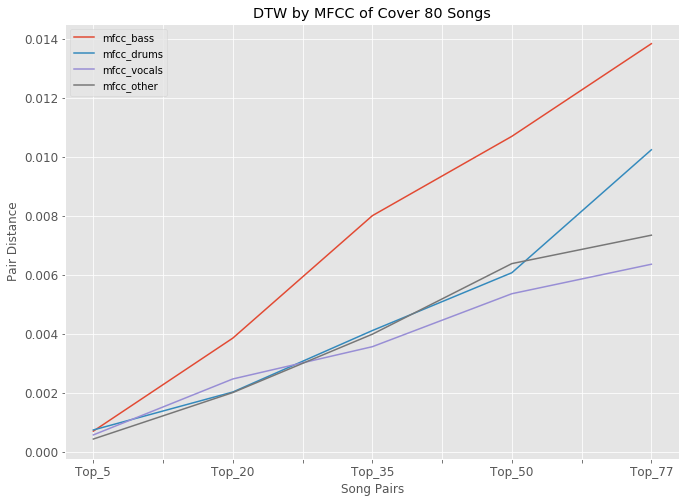

In [92]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
ax = dist_mfcc_Cover_80a.plot(kind='line', title ="DTW by MFCC of Cover 80 Songs", figsize=(11, 8), legend=True, fontsize=12)
ax.set_xlabel("Song Pairs", fontsize=12)
ax.set_ylabel("Pair Distance", fontsize=12)
plt.show()

In [30]:
###GFCC#####
#### BASS####
dist_gfcc_5_b, cost_gfcc_5_b, acc_cost_gfcc_5_b, path = dtw(GFCC1_bass_tr_1_5 .T, GFCC2_bass_tr_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_20_b, cost_gfcc_20_b, acc_cost_gfcc_20_b, path = dtw(GFCC1_bass_tr_1_20 .T, GFCC2_bass_tr_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_35_b, cost_gfcc_35_b, acc_cost_gfcc_35_b, path = dtw(GFCC1_bass_tr_1_35 .T, GFCC2_bass_tr_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_50_b, cost_gfcc_50_b, acc_cost_gfcc_50_b, path = dtw(GFCC1_bass_tr_1_50 .T, GFCC2_bass_tr_1_50 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_77_b, cost_gfcc_77_b, acc_cost_gfcc_77_b, path = dtw(GFCC1_bass_tr_1_77 .T, GFCC2_bass_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_gfcc_bass = ([dist_gfcc_5_b,dist_gfcc_20_b,dist_gfcc_35_b,dist_gfcc_50_b,dist_gfcc_77_b])
cost_gfcc_bass = ([cost_gfcc_5_b,cost_gfcc_20_b,cost_gfcc_35_b,cost_gfcc_50_b,cost_gfcc_77_b])
acc_cost_gfcc_bass = ([acc_cost_gfcc_5_b,acc_cost_gfcc_20_b,acc_cost_gfcc_35_b,acc_cost_gfcc_50_b,acc_cost_gfcc_77_b])
print('Norm. dist. b/w two sounds: dist_gfcc_bass -', dist_gfcc_bass)

#### DRUMS####
dist_gfcc_5_d, cost_gfcc_5_d, acc_cost_gfcc_5_d, path = dtw(GFCC1_drums_tr_1_5 .T, GFCC2_drums_tr_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_20_d, cost_gfcc_20_d, acc_cost_gfcc_20_d, path = dtw(GFCC1_drums_tr_1_20 .T, GFCC2_drums_tr_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_35_d, cost_gfcc_35_d, acc_cost_gfcc_35_d, path = dtw(GFCC1_drums_tr_1_35 .T, GFCC2_drums_tr_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_50_d, cost_gfcc_50_d, acc_cost_gfcc_50_d, path = dtw(GFCC1_drums_tr_1_50 .T, GFCC2_drums_tr_1_50 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_77_d, cost_gfcc_77_d, acc_cost_gfcc_77_d, path = dtw(GFCC1_drums_tr_1_77 .T, GFCC2_drums_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_gfcc_drums = ([dist_gfcc_5_d,dist_gfcc_20_d,dist_gfcc_35_d,dist_gfcc_50_d,dist_gfcc_77_d])
cost_gfcc_drums = ([cost_gfcc_5_d,cost_gfcc_20_d,cost_gfcc_35_d,cost_gfcc_50_d,cost_gfcc_77_d])
acc_cost_gfcc_drums = ([acc_cost_gfcc_5_d,acc_cost_gfcc_20_d,acc_cost_gfcc_35_d,acc_cost_gfcc_50_d,acc_cost_gfcc_77_d])
print('Norm. dist. b/w two sounds: dist_gfcc_drums -', dist_gfcc_drums)


#### VOCALS####
dist_gfcc_5_v, cost_gfcc_5_v, acc_cost_gfcc_5_v, path = dtw(GFCC1_vocals_tr_1_5 .T, GFCC2_vocals_tr_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_20_v, cost_gfcc_20_v, acc_cost_gfcc_20_v, path = dtw(GFCC1_vocals_tr_1_20 .T, GFCC2_vocals_tr_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_35_v, cost_gfcc_35_v, acc_cost_gfcc_35_v, path = dtw(GFCC1_vocals_tr_1_35 .T, GFCC2_vocals_tr_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_50_v, cost_gfcc_50_v, acc_cost_gfcc_50_v, path = dtw(GFCC1_vocals_tr_1_50 .T, GFCC2_vocals_tr_1_50 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_77_v, cost_gfcc_77_v, acc_cost_gfcc_77_v, path = dtw(GFCC1_vocals_tr_1_77 .T, GFCC2_vocals_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_gfcc_vocals = ([dist_gfcc_5_v,dist_gfcc_20_v,dist_gfcc_35_v,dist_gfcc_50_v,dist_gfcc_77_v])
cost_gfcc_vocals = ([cost_gfcc_5_v,cost_gfcc_20_v,cost_gfcc_35_v,cost_gfcc_50_v,cost_gfcc_77_v])
acc_cost_gfcc_vocals = ([acc_cost_gfcc_5_v,acc_cost_gfcc_20_v,acc_cost_gfcc_35_v,acc_cost_gfcc_50_v,acc_cost_gfcc_77_v])
print('Norm. dist. b/w two sounds: dist_gfcc_vocals -', dist_gfcc_vocals)


#### OTHER####
dist_gfcc_5_o, cost_gfcc_5_o, acc_cost_gfcc_5_o, path = dtw(GFCC1_other_tr_1_5 .T, GFCC2_other_tr_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_20_o, cost_gfcc_20_o, acc_cost_gfcc_20_o, path = dtw(GFCC1_other_tr_1_20 .T, GFCC2_other_tr_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_35_o, cost_gfcc_35_o, acc_cost_gfcc_35_o, path = dtw(GFCC1_other_tr_1_35 .T, GFCC2_other_tr_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_50_o, cost_gfcc_50_o, acc_cost_gfcc_50_o, path = dtw(GFCC1_other_tr_1_50 .T, GFCC2_other_tr_1_50 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_77_o, cost_gfcc_77_o, acc_cost_gfcc_77_o, path = dtw(GFCC1_other_tr_1_77 .T, GFCC2_other_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_gfcc_other = ([dist_gfcc_5_o,dist_gfcc_20_o,dist_gfcc_35_o,dist_gfcc_50_o,dist_gfcc_77_o])
cost_gfcc_other = ([cost_gfcc_5_o,cost_gfcc_20_o,cost_gfcc_35_o,cost_gfcc_50_o,cost_gfcc_77_o])
acc_cost_gfcc_other = ([acc_cost_gfcc_5_o,acc_cost_gfcc_20_o,acc_cost_gfcc_35_o,acc_cost_gfcc_50_o,acc_cost_gfcc_77_o])
print('Norm. dist. b/w two sounds: dist_gfcc_other -', dist_gfcc_other)


Norm. dist. b/w two sounds: dist_gfcc_bass - [2.1861209385097027, 11.180494328029454, 22.078702670522034, 30.195416799746454, 40.31801223475486]
Norm. dist. b/w two sounds: dist_gfcc_drums - [16.164137214422226, 26.07770125316847, 62.57794662360493, 94.4908576258963, 148.5922255186506]
Norm. dist. b/w two sounds: dist_gfcc_vocals - [68.42659974098206, 320.7613139152527, 432.1305058002472, 578.4751142263412, 966.7194122076035]
Norm. dist. b/w two sounds: dist_gfcc_other - [36.44535171985626, 191.57095271348953, 275.8248564898968, 428.98061284422874, 620.7191577851772]


In [94]:
li = [dist_gfcc_bass, dist_gfcc_drums, dist_gfcc_vocals, dist_gfcc_other]
dist_gfcc_Cover_80 = pd.DataFrame(data = li, columns= ["Top_5", "Top_20", "Top_35", "Top_50", "Top_77"])
dist_gfcc_Cover_80T = dist_gfcc_Cover_80.T
dist_gfcc_Cover_80T
dist_gfcc_Cover_80a =dist_gfcc_Cover_80T.rename(columns = {dist_gfcc_Cover_80T.columns[0]:'gfcc_bass', dist_gfcc_Cover_80T.columns[1]:'gfcc_drums', 
                                                           dist_gfcc_Cover_80T.columns[2]:'gfcc_vocals', dist_gfcc_Cover_80T.columns[3]:'gfcc_other'})

dist_gfcc_Cover_80a

,gfcc_bass,gfcc_drums,gfcc_vocals,gfcc_other
Top_5,2.186121,16.164137,68.426600,36.445352
Top_20,11.180494,26.077701,320.761314,191.570953
Top_35,22.078703,62.577947,432.130506,275.824856
Top_50,30.195417,94.490858,578.475114,428.980613
Top_77,40.318012,148.592226,966.719412,620.719158


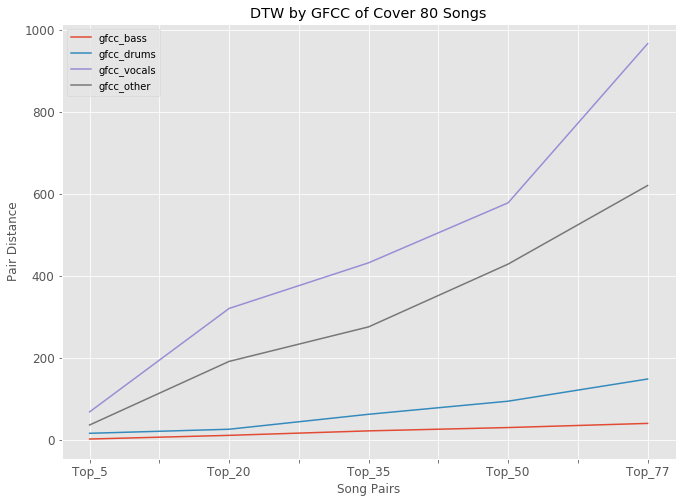

In [98]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
ax = dist_gfcc_Cover_80a.plot(kind='line', title ="DTW by GFCC of Cover 80 Songs", figsize=(11, 8), legend=True, fontsize=12)
ax.set_xlabel("Song Pairs", fontsize=12)
ax.set_ylabel("Pair Distance", fontsize=12)
plt.show()

In [32]:
#### HPCP####
#### BASS####
dist_hpcp_5_b, cost_hpcp_5_b, acc_cost_hpcp_5_b, path = dtw(HPCP1_bass_tr_1_5 .T, HPCP2_bass_tr_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_20_b, cost_hpcp_20_b, acc_cost_hpcp_20_b, path = dtw(HPCP1_bass_tr_1_20 .T, HPCP2_bass_tr_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_35_b, cost_hpcp_35_b, acc_cost_hpcp_35_b, path = dtw(HPCP1_bass_tr_1_35 .T, HPCP2_bass_tr_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_50_b, cost_hpcp_50_b, acc_cost_hpcp_50_b, path = dtw(HPCP1_bass_tr_1_50 .T, HPCP2_bass_tr_1_50 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_77_b, cost_hpcp_77_b, acc_cost_hpcp_77_b, path = dtw(HPCP1_bass_tr_1_77 .T, HPCP2_bass_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_hpcp_bass = ([dist_hpcp_5_b,dist_hpcp_20_b,dist_hpcp_35_b,dist_hpcp_50_b,dist_hpcp_77_b])
cost_hpcp_bass = ([cost_hpcp_5_b,cost_hpcp_20_b,cost_hpcp_35_b,cost_hpcp_50_b,cost_hpcp_77_b])
acc_cost_hpcp_bass = ([acc_cost_hpcp_5_b,acc_cost_hpcp_20_b,acc_cost_hpcp_35_b,acc_cost_hpcp_50_b,acc_cost_hpcp_77_b])
print('Norm. dist. b/w two sounds: dist_hpcp_bass -', dist_hpcp_bass)

#### DRUMS####
dist_hpcp_5_d, cost_hpcp_5_d, acc_cost_hpcp_5_d, path = dtw(HPCP1_drums_tr_1_5 .T, HPCP2_drums_tr_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_20_d, cost_hpcp_20_d, acc_cost_hpcp_20_d, path = dtw(HPCP1_drums_tr_1_20 .T, HPCP2_drums_tr_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_35_d, cost_hpcp_35_d, acc_cost_hpcp_35_d, path = dtw(HPCP1_drums_tr_1_35 .T, HPCP2_drums_tr_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_50_d, cost_hpcp_50_d, acc_cost_hpcp_50_d, path = dtw(HPCP1_drums_tr_1_50 .T, HPCP2_drums_tr_1_50 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_77_d, cost_hpcp_77_d, acc_cost_hpcp_77_d, path = dtw(HPCP1_drums_tr_1_77 .T, HPCP2_drums_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_hpcp_drums = ([dist_hpcp_5_d,dist_hpcp_20_d,dist_hpcp_35_d,dist_hpcp_50_d,dist_hpcp_77_d])
cost_hpcp_drums = ([cost_hpcp_5_d,cost_hpcp_20_d,cost_hpcp_35_d,cost_hpcp_50_d,cost_hpcp_77_d])
acc_cost_hpcp_drums = ([acc_cost_hpcp_5_d,acc_cost_hpcp_20_d,acc_cost_hpcp_35_d,acc_cost_hpcp_50_d,acc_cost_hpcp_77_d])
print('Norm. dist. b/w two sounds: dist_hpcp_drums -', dist_hpcp_drums)

#### VOCALS####
dist_hpcp_5_v, cost_hpcp_5_v, acc_cost_hpcp_5_v, path = dtw(HPCP1_vocals_tr_1_5 .T, HPCP2_vocals_tr_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_20_v, cost_hpcp_20_v, acc_cost_hpcp_20_v, path = dtw(HPCP1_vocals_tr_1_20 .T, HPCP2_vocals_tr_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_35_v, cost_hpcp_35_v, acc_cost_hpcp_35_v, path = dtw(HPCP1_vocals_tr_1_35 .T, HPCP2_vocals_tr_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_50_v, cost_hpcp_50_v, acc_cost_hpcp_50_v, path = dtw(HPCP1_vocals_tr_1_50 .T, HPCP2_vocals_tr_1_50 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_77_v, cost_hpcp_77_v, acc_cost_hpcp_77_v, path = dtw(HPCP1_vocals_tr_1_77 .T, HPCP2_vocals_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_hpcp_vocals = ([dist_hpcp_5_v,dist_hpcp_20_v,dist_hpcp_35_v,dist_hpcp_50_v,dist_hpcp_77_v])
cost_hpcp_vocals = ([cost_hpcp_5_v,cost_hpcp_20_v,cost_hpcp_35_v,cost_hpcp_50_v,cost_hpcp_77_v])
acc_cost_hpcp_vocals = ([acc_cost_hpcp_5_v,acc_cost_hpcp_20_v,acc_cost_hpcp_35_v,acc_cost_hpcp_50_v,acc_cost_hpcp_77_v])
print('Norm. dist. b/w two sounds: dist_hpcp_vocals -', dist_hpcp_vocals)

#### OTHER####
dist_hpcp_5_o, cost_hpcp_5_o, acc_cost_hpcp_5_o, path = dtw(HPCP1_other_tr_1_5 .T, HPCP2_other_tr_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_20_o, cost_hpcp_20_o, acc_cost_hpcp_20_o, path = dtw(HPCP1_other_tr_1_20 .T, HPCP2_other_tr_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_35_o, cost_hpcp_35_o, acc_cost_hpcp_35_o, path = dtw(HPCP1_other_tr_1_35 .T, HPCP2_other_tr_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_50_o, cost_hpcp_50_o, acc_cost_hpcp_50_o, path = dtw(HPCP1_other_tr_1_50 .T, HPCP2_other_tr_1_50 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_77_o, cost_hpcp_77_o, acc_cost_hpcp_77_o, path = dtw(HPCP1_other_tr_1_77 .T, HPCP2_other_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_hpcp_other = ([dist_hpcp_5_o,dist_hpcp_20_o,dist_hpcp_35_o,dist_hpcp_50_o,dist_hpcp_77_o])
cost_hpcp_other = ([cost_hpcp_5_o,cost_hpcp_20_o,cost_hpcp_35_o,cost_hpcp_50_o,cost_hpcp_77_o])
acc_cost_hpcp_other = ([acc_cost_hpcp_5_o,acc_cost_hpcp_20_o,acc_cost_hpcp_35_o,acc_cost_hpcp_50_o,acc_cost_hpcp_77_o])
print('Norm. dist. b/w two sounds: dist_hpcp_other -', dist_hpcp_other)



Norm. dist. b/w two sounds: dist_hpcp_bass - [0.19321412639692426, 0.6484606773592532, 1.0171493054367602, 1.4471636884845793, 2.0199924842454493]
Norm. dist. b/w two sounds: dist_hpcp_drums - [0.19629252701997757, 0.9558666453231126, 1.5140071243513376, 2.2570877897087485, 3.558566476625856]
Norm. dist. b/w two sounds: dist_hpcp_vocals - [0.16869191080331802, 0.5703152343630791, 0.7024354562163353, 0.9718449637293816, 1.5611738786101341]
Norm. dist. b/w two sounds: dist_hpcp_other - [0.07757101953029633, 0.44966915249824524, 0.8593807071447372, 1.0840294063091278, 1.6562436074018478]


In [95]:
li = [dist_hpcp_bass, dist_hpcp_drums, dist_hpcp_vocals, dist_hpcp_other]
dist_hpcp_Cover_80 = pd.DataFrame(data = li, columns= ["Top_5", "Top_20", "Top_35", "Top_50", "Top_77"])
dist_hpcp_Cover_80T = dist_hpcp_Cover_80.T
dist_hpcp_Cover_80T
dist_hpcp_Cover_80a =dist_hpcp_Cover_80T.rename(columns = {dist_hpcp_Cover_80T.columns[0]:'hpcp_bass', dist_hpcp_Cover_80T.columns[1]:'hpcp_drums', 
                                                           dist_hpcp_Cover_80T.columns[2]:'hpcp_vocals', dist_hpcp_Cover_80T.columns[3]:'hpcp_other'})

dist_hpcp_Cover_80a

,hpcp_bass,hpcp_drums,hpcp_vocals,hpcp_other
Top_5,0.193214,0.196293,0.168692,0.077571
Top_20,0.648461,0.955867,0.570315,0.449669
Top_35,1.017149,1.514007,0.702435,0.859381
Top_50,1.447164,2.257088,0.971845,1.084029
Top_77,2.019992,3.558566,1.561174,1.656244


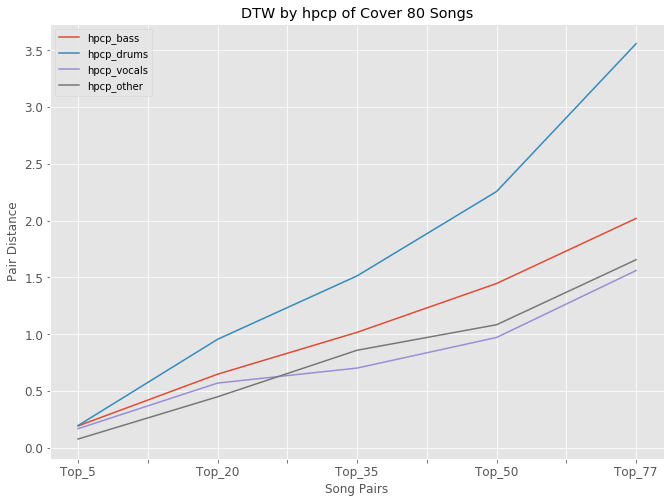

In [99]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
ax = dist_hpcp_Cover_80a.plot(kind='line', title ="DTW by hpcp of Cover 80 Songs", figsize=(11, 8), legend=True, fontsize=12)
ax.set_xlabel("Song Pairs", fontsize=12)
ax.set_ylabel("Pair Distance", fontsize=12)
plt.show()

In [34]:
#### SIM_MAT & SIM_DISTANCE ####
#### BASS ####

dist_sim_mat_dis_5, cost_sim_mat_dis_5, acc_cost_sim_mat_dis_5, path = dtw(sim_mat_bass_tr_1_5 .T, sim_dist_bass_tr_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_20, cost_sim_mat_dis_20, acc_cost_sim_mat_dis_20, path = dtw(sim_mat_bass_tr_1_20 .T, sim_dist_bass_tr_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_35, cost_sim_mat_dis_35, acc_cost_sim_mat_dis_35, path = dtw(sim_mat_bass_tr_1_35 .T, sim_dist_bass_tr_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_50, cost_sim_mat_dis_50, acc_cost_sim_mat_dis_50, path = dtw(sim_mat_bass_tr_1_50 .T, sim_dist_bass_tr_1_50 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_77, cost_sim_mat_dis_77, acc_cost_sim_mat_dis_77, path = dtw(sim_mat_bass_tr_1_77 .T, sim_dist_bass_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_sim_mat_dis_bass = ([dist_sim_mat_dis_5,dist_sim_mat_dis_20,dist_sim_mat_dis_35,dist_sim_mat_dis_50,dist_sim_mat_dis_77])
cost_sim_mat_dis_bass = ([cost_sim_mat_dis_5,cost_sim_mat_dis_20,cost_sim_mat_dis_35,cost_sim_mat_dis_50,cost_sim_mat_dis_77])
acc_cost_sim_mat_dis_bass = ([acc_cost_sim_mat_dis_5,acc_cost_sim_mat_dis_20,acc_cost_sim_mat_dis_35,acc_cost_sim_mat_dis_50,acc_cost_sim_mat_dis_77])
print('Norm. dist. b/w two sounds: dist_sim_mat_dis_bass -', dist_sim_mat_dis_bass)


#### DRUMS #### 
dist_sim_mat_dis_5, cost_sim_mat_dis_5, acc_cost_sim_mat_dis_5, path = dtw(sim_mat_drums_tr_1_5 .T, sim_dist_drums_tr_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_20, cost_sim_mat_dis_20, acc_cost_sim_mat_dis_20, path = dtw(sim_mat_drums_tr_1_20 .T, sim_dist_drums_tr_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_35, cost_sim_mat_dis_35, acc_cost_sim_mat_dis_35, path = dtw(sim_mat_drums_tr_1_35 .T, sim_dist_drums_tr_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_50, cost_sim_mat_dis_50, acc_cost_sim_mat_dis_50, path = dtw(sim_mat_drums_tr_1_50 .T, sim_dist_drums_tr_1_50 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_77, cost_sim_mat_dis_77, acc_cost_sim_mat_dis_77, path = dtw(sim_mat_drums_tr_1_77 .T, sim_dist_drums_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_sim_mat_dis_drums = ([dist_sim_mat_dis_5,dist_sim_mat_dis_20,dist_sim_mat_dis_35,dist_sim_mat_dis_50,dist_sim_mat_dis_77])
cost_sim_mat_dis_drums = ([cost_sim_mat_dis_5,cost_sim_mat_dis_20,cost_sim_mat_dis_35,cost_sim_mat_dis_50,cost_sim_mat_dis_77])
acc_cost_sim_mat_dis_drums = ([acc_cost_sim_mat_dis_5,acc_cost_sim_mat_dis_20,acc_cost_sim_mat_dis_35,acc_cost_sim_mat_dis_50,acc_cost_sim_mat_dis_77])
print('Norm. dist. b/w two sounds: dist_sim_mat_dis_drums -', dist_sim_mat_dis_drums)

#### VOCALS ####

dist_sim_mat_dis_5, cost_sim_mat_dis_5, acc_cost_sim_mat_dis_5, path = dtw(sim_mat_vocals_tr_1_5 .T, sim_dist_vocals_tr_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_20, cost_sim_mat_dis_20, acc_cost_sim_mat_dis_20, path = dtw(sim_mat_vocals_tr_1_20 .T, sim_dist_vocals_tr_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_35, cost_sim_mat_dis_35, acc_cost_sim_mat_dis_35, path = dtw(sim_mat_vocals_tr_1_35 .T, sim_dist_vocals_tr_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_50, cost_sim_mat_dis_50, acc_cost_sim_mat_dis_50, path = dtw(sim_mat_vocals_tr_1_50 .T, sim_dist_vocals_tr_1_50 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_77, cost_sim_mat_dis_77, acc_cost_sim_mat_dis_77, path = dtw(sim_mat_vocals_tr_1_77 .T, sim_dist_vocals_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_sim_mat_dis_vocals = ([dist_sim_mat_dis_5,dist_sim_mat_dis_20,dist_sim_mat_dis_35,dist_sim_mat_dis_50,dist_sim_mat_dis_77])
cost_sim_mat_dis_vocals = ([cost_sim_mat_dis_5,cost_sim_mat_dis_20,cost_sim_mat_dis_35,cost_sim_mat_dis_50,cost_sim_mat_dis_77])
acc_cost_sim_mat_dis_vocals = ([acc_cost_sim_mat_dis_5,acc_cost_sim_mat_dis_20,acc_cost_sim_mat_dis_35,acc_cost_sim_mat_dis_50,acc_cost_sim_mat_dis_77])
print('Norm. dist. b/w two sounds: dist_sim_mat_dis_vocals -', dist_sim_mat_dis_vocals)

#### OTHER #### 

dist_sim_mat_dis_5, cost_sim_mat_dis_5, acc_cost_sim_mat_dis_5, path = dtw(sim_mat_other_tr_1_5 .T, sim_dist_other_tr_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_20, cost_sim_mat_dis_20, acc_cost_sim_mat_dis_20, path = dtw(sim_mat_other_tr_1_20 .T, sim_dist_other_tr_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_35, cost_sim_mat_dis_35, acc_cost_sim_mat_dis_35, path = dtw(sim_mat_other_tr_1_35 .T, sim_dist_other_tr_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_50, cost_sim_mat_dis_50, acc_cost_sim_mat_dis_50, path = dtw(sim_mat_other_tr_1_50 .T, sim_dist_other_tr_1_50 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_77, cost_sim_mat_dis_77, acc_cost_sim_mat_dis_77, path = dtw(sim_mat_other_tr_1_77 .T, sim_dist_other_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=None))

dist_sim_mat_dis_other = ([dist_sim_mat_dis_5,dist_sim_mat_dis_20,dist_sim_mat_dis_35,dist_sim_mat_dis_50,dist_sim_mat_dis_77])
cost_sim_mat_dis_other = ([cost_sim_mat_dis_5,cost_sim_mat_dis_20,cost_sim_mat_dis_35,cost_sim_mat_dis_50,cost_sim_mat_dis_77])
acc_cost_sim_mat_dis_other = ([acc_cost_sim_mat_dis_5,acc_cost_sim_mat_dis_20,acc_cost_sim_mat_dis_35,acc_cost_sim_mat_dis_50,acc_cost_sim_mat_dis_77])
print('Norm. dist. b/w two sounds: dist_sim_mat_dis_other -', dist_sim_mat_dis_other)

Norm. dist. b/w two sounds: dist_sim_mat_dis_bass - [3652.4244678970426, 10594.648566555232, 17809.393331578, 26404.685752679594, 35460.38845039066]
Norm. dist. b/w two sounds: dist_sim_mat_dis_drums - [3195.6764252800494, 11116.404973387718, 20611.293564416468, 32188.30039670877, 44859.51455995999]
Norm. dist. b/w two sounds: dist_sim_mat_dis_vocals - [3630.521168973297, 10843.795301968232, 18023.529374159873, 26677.21781286318, 34974.09167613182]
Norm. dist. b/w two sounds: dist_sim_mat_dis_other - [3504.6479043196887, 12200.990344524384, 20838.34958536364, 31443.842980593443, 41656.752270175144]


In [100]:
li = [dist_sim_mat_dis_bass, dist_sim_mat_dis_drums, dist_sim_mat_dis_vocals, dist_sim_mat_dis_other]
dist_sim_mat_dis_Cover_80 = pd.DataFrame(data = li, columns= ["Top_5", "Top_20", "Top_35", "Top_50", "Top_77"])
dist_sim_mat_dis_Cover_80


dist_sim_mat_dis_Cover_80 = pd.DataFrame(data = li, columns= ["Top_5", "Top_20", "Top_35", "Top_50", "Top_77"])
dist_sim_mat_dis_Cover_80T = dist_sim_mat_dis_Cover_80.T
dist_sim_mat_dis_Cover_80T
dist_sim_mat_dis_Cover_80a =dist_sim_mat_dis_Cover_80T.rename(columns = {dist_sim_mat_dis_Cover_80T.columns[0]:'sim_mat_dis_bass', dist_sim_mat_dis_Cover_80T.columns[1]:'sim_mat_dis_drums', 
                                                           dist_sim_mat_dis_Cover_80T.columns[2]:'sim_mat_dis_vocals', dist_sim_mat_dis_Cover_80T.columns[3]:'sim_mat_dis_other'})

dist_sim_mat_dis_Cover_80a

,sim_mat_dis_bass,sim_mat_dis_drums,sim_mat_dis_vocals,sim_mat_dis_other
Top_5,3652.424468,3195.676425,3630.521169,3504.647904
Top_20,10594.648567,11116.404973,10843.795302,12200.990345
Top_35,17809.393332,20611.293564,18023.529374,20838.349585
Top_50,26404.685753,32188.300397,26677.217813,31443.842981
Top_77,35460.388450,44859.514560,34974.091676,41656.752270


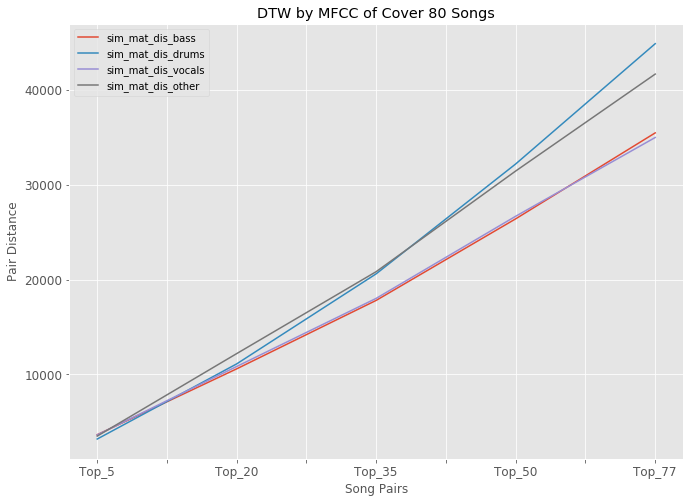

In [101]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
ax = dist_sim_mat_dis_Cover_80a.plot(kind='line', title ="DTW by MFCC of Cover 80 Songs", figsize=(11, 8), legend=True, fontsize=12)
ax.set_xlabel("Song Pairs", fontsize=12)
ax.set_ylabel("Pair Distance", fontsize=12)
plt.show()

In [36]:
## ADD SIM ARGMIN

### DTW of Suspected 50 - ALL - features

In [37]:
## Compute the dynamic time warped distance between x and y
from dtw import dtw
from numpy.linalg import norm
###MFCC#####
#### BASS####
dist_mfcc_5_b_t, cost_mfcc_5_b_t, acc_cost_mfcc_5_b_t, path = dtw(MFCC1_bass_ts_1_5 .T, MFCC2_bass_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_mfcc_20_b_t, cost_mfcc_20_b_t, acc_cost_mfcc_20_b_t, path = dtw(MFCC1_bass_ts_1_20 .T, MFCC2_bass_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_mfcc_35_b_t, cost_mfcc_35_b_t, acc_cost_mfcc_35_b_t, path = dtw(MFCC1_bass_ts_1_35 .T, MFCC2_bass_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_mfcc_45_b_t, cost_mfcc_45_b_t, acc_cost_mfcc_45_b_t, path = dtw(MFCC1_bass_ts_1_45 .T, MFCC2_bass_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_mfcc_bass_t = ([dist_mfcc_5_b_t,dist_mfcc_20_b_t,dist_mfcc_35_b_t,dist_mfcc_45_b_t])
cost_mfcc_bass_t = ([cost_mfcc_5_b_t,cost_mfcc_20_b_t,cost_mfcc_35_b_t,cost_mfcc_45_b_t])
acc_cost_mfcc_bass_t = ([acc_cost_mfcc_5_b_t,acc_cost_mfcc_20_b_t,acc_cost_mfcc_35_b_t,acc_cost_mfcc_45_b_t])
print('Norm. dist. b/w two sounds: dist_mfcc_bass_t -', dist_mfcc_bass_t)

#### DRUMS####
dist_mfcc_5_d_t, cost_mfcc_5_d_t, acc_cost_mfcc_5_d_t, path = dtw(MFCC1_drums_ts_1_5 .T, MFCC2_drums_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_mfcc_20_d_t, cost_mfcc_20_d_t, acc_cost_mfcc_20_d_t, path = dtw(MFCC1_drums_ts_1_20 .T, MFCC2_drums_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_mfcc_35_d_t, cost_mfcc_35_d_t, acc_cost_mfcc_35_d_t, path = dtw(MFCC1_drums_ts_1_35 .T, MFCC2_drums_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_mfcc_45_d_t, cost_mfcc_45_d_t, acc_cost_mfcc_45_d_t, path = dtw(MFCC1_drums_ts_1_45 .T, MFCC2_drums_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_mfcc_drums_t = ([dist_mfcc_5_d_t,dist_mfcc_20_d_t,dist_mfcc_35_d_t,dist_mfcc_45_d_t])
cost_mfcc_drums_t = ([cost_mfcc_5_d_t,cost_mfcc_20_d_t,cost_mfcc_35_d_t,cost_mfcc_45_d_t])
acc_cost_mfcc_drums_t = ([acc_cost_mfcc_5_d_t,acc_cost_mfcc_20_d_t,acc_cost_mfcc_35_d_t,acc_cost_mfcc_45_d_t])
print('Norm. dist. b/w two sounds: dist_mfcc_drums_t -', dist_mfcc_drums_t)

#### VOCALS####
dist_mfcc_5_v_t, cost_mfcc_5_v_t, acc_cost_mfcc_5_v_t, path = dtw(MFCC1_vocals_ts_1_5 .T, MFCC2_vocals_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_mfcc_20_v_t, cost_mfcc_20_v_t, acc_cost_mfcc_20_v_t, path = dtw(MFCC1_vocals_ts_1_20 .T, MFCC2_vocals_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_mfcc_35_v_t, cost_mfcc_35_v_t, acc_cost_mfcc_35_v_t, path = dtw(MFCC1_vocals_ts_1_35 .T, MFCC2_vocals_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_mfcc_45_v_t, cost_mfcc_45_v_t, acc_cost_mfcc_45_v_t, path = dtw(MFCC1_vocals_ts_1_45 .T, MFCC2_vocals_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_mfcc_vocals_t = ([dist_mfcc_5_v_t,dist_mfcc_20_v_t,dist_mfcc_35_v_t,dist_mfcc_45_v_t])
cost_mfcc_vocals_t = ([cost_mfcc_5_v_t,cost_mfcc_20_v_t,cost_mfcc_35_v_t,cost_mfcc_45_v_t])
acc_cost_mfcc_vocals_t = ([acc_cost_mfcc_5_v_t,acc_cost_mfcc_20_v_t,acc_cost_mfcc_35_v_t,acc_cost_mfcc_45_v_t])
print('Norm. dist. b/w two sounds: dist_mfcc_vocals_t -', dist_mfcc_vocals_t)

#### OTHER####
dist_mfcc_5_o_t, cost_mfcc_5_o_t, acc_cost_mfcc_5_o_t, path = dtw(MFCC1_other_ts_1_5 .T, MFCC2_other_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_mfcc_20_o_t, cost_mfcc_20_o_t, acc_cost_mfcc_20_o_t, path = dtw(MFCC1_other_ts_1_20 .T, MFCC2_other_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_mfcc_35_o_t, cost_mfcc_35_o_t, acc_cost_mfcc_35_o_t, path = dtw(MFCC1_other_ts_1_35 .T, MFCC2_other_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_mfcc_45_o_t, cost_mfcc_45_o_t, acc_cost_mfcc_45_o_t, path = dtw(MFCC1_other_ts_1_45 .T, MFCC2_other_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_mfcc_other_t = ([dist_mfcc_5_o_t,dist_mfcc_20_o_t,dist_mfcc_35_o_t,dist_mfcc_45_o_t])
cost_mfcc_other_t = ([cost_mfcc_5_o_t,cost_mfcc_20_o_t,cost_mfcc_35_o_t,cost_mfcc_45_o_t])
acc_cost_mfcc_other_t = ([acc_cost_mfcc_5_o_t,acc_cost_mfcc_20_o_t,acc_cost_mfcc_35_o_t,acc_cost_mfcc_45_o_t])
print('Norm. dist. b/w two sounds: dist_mfcc_other_t -', dist_mfcc_other_t)

Norm. dist. b/w two sounds: dist_mfcc_bass_t - [0.0062491918142768554, 0.0076720152375639936, 0.012148125393351965, 0.014332297563370393]
Norm. dist. b/w two sounds: dist_mfcc_drums_t - [0.004694202361861244, 0.006670872889024793, 0.009270802360246355, 0.011710181698080913]
Norm. dist. b/w two sounds: dist_mfcc_vocals_t - [0.0006563718488905579, 0.002360026336919674, 0.0037899244629893136, 0.006981338174412488]
Norm. dist. b/w two sounds: dist_mfcc_other_t - [0.0007647579391232284, 0.0034224539781462227, 0.005641971109071164, 0.006213186146851513]


In [102]:
li = [dist_mfcc_bass_t, dist_mfcc_drums_t, dist_mfcc_vocals_t, dist_mfcc_other_t]
dist_mfcc_Susp_50 = pd.DataFrame(data = li, columns= ["Top_5", "Top_20", "Top_35", "Top_50"])

dist_mfcc_Susp_50

dist_mfcc_Susp_50T = dist_mfcc_Susp_50.T
dist_mfcc_Susp_50T
dist_mfcc_Susp_50a =dist_mfcc_Susp_50T.rename(columns = {dist_mfcc_Susp_50T.columns[0]:'mfcc_bass', dist_mfcc_Susp_50T.columns[1]:'mfcc_drums', 
                                                           dist_mfcc_Susp_50T.columns[2]:'mfcc_vocals', dist_mfcc_Susp_50T.columns[3]:'mfcc_other'})

dist_mfcc_Susp_50a

,mfcc_bass,mfcc_drums,mfcc_vocals,mfcc_other
Top_5,0.006249,0.004694,0.000656,0.000765
Top_20,0.007672,0.006671,0.002360,0.003422
Top_35,0.012148,0.009271,0.003790,0.005642
Top_50,0.014332,0.011710,0.006981,0.006213


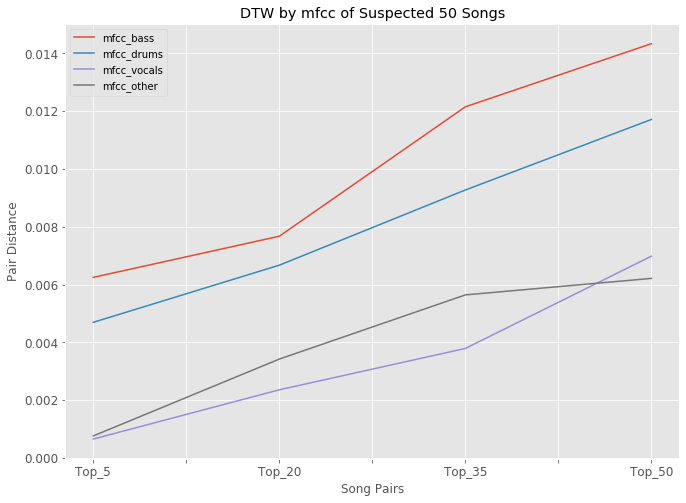

In [106]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
ax = dist_mfcc_Susp_50a.plot(kind='line', title ="DTW by mfcc of Suspected 50 Songs", figsize=(11, 8), legend=True, fontsize=12)
ax.set_xlabel("Song Pairs", fontsize=12)
ax.set_ylabel("Pair Distance", fontsize=12)
plt.show()

In [39]:

###GFCC#####
#### BASS####
dist_gfcc_5_b_t, cost_gfcc_5_b_t, acc_cost_gfcc_5_b_t, path = dtw(GFCC1_bass_ts_1_5 .T, GFCC2_bass_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_20_b_t, cost_gfcc_20_b_t, acc_cost_gfcc_20_b_t, path = dtw(GFCC1_bass_ts_1_20 .T, GFCC2_bass_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_35_b_t, cost_gfcc_35_b_t, acc_cost_gfcc_35_b_t, path = dtw(GFCC1_bass_ts_1_35 .T, GFCC2_bass_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_45_b_t, cost_gfcc_45_b_t, acc_cost_gfcc_45_b_t, path = dtw(GFCC1_bass_ts_1_45 .T, GFCC2_bass_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_gfcc_bass_t = ([dist_gfcc_5_b_t,dist_gfcc_20_b_t,dist_gfcc_35_b_t,dist_gfcc_45_b_t])
cost_gfcc_bass_t = ([cost_gfcc_5_b_t,cost_gfcc_20_b_t,cost_gfcc_35_b_t,cost_gfcc_45_b_t])
acc_cost_gfcc_bass_t = ([acc_cost_gfcc_5_b_t,acc_cost_gfcc_20_b_t,acc_cost_gfcc_35_b_t,acc_cost_gfcc_45_b_t])
print('Norm. dist. b/w two sounds: dist_gfcc_bass_t -', dist_mfcc_bass_t)


#### DRUMS####
dist_gfcc_5_d_t, cost_gfcc_5_d_t, acc_cost_gfcc_5_d_t, path = dtw(GFCC1_drums_ts_1_5 .T, GFCC2_drums_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_20_d_t, cost_gfcc_20_d_t, acc_cost_gfcc_20_d_t, path = dtw(GFCC1_drums_ts_1_20 .T, GFCC2_drums_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_35_d_t, cost_gfcc_35_d_t, acc_cost_gfcc_35_d_t, path = dtw(GFCC1_drums_ts_1_35 .T, GFCC2_drums_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_45_d_t, cost_gfcc_45_d_t, acc_cost_gfcc_45_d_t, path = dtw(GFCC1_drums_ts_1_45 .T, GFCC2_drums_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_gfcc_drums_t = ([dist_gfcc_5_d_t,dist_gfcc_20_d_t,dist_gfcc_35_d_t,dist_gfcc_45_d_t])
cost_gfcc_drums_t = ([cost_gfcc_5_d_t,cost_gfcc_20_d_t,cost_gfcc_35_d_t,cost_gfcc_45_d_t])
acc_cost_gfcc_drums_t = ([acc_cost_gfcc_5_d_t,acc_cost_gfcc_20_d_t,acc_cost_gfcc_35_d_t,acc_cost_gfcc_45_d_t])
print('Norm. dist. b/w two sounds: dist_gfcc_drums_t -', dist_mfcc_drums_t)


#### VOCALS####
dist_gfcc_5_v_t, cost_gfcc_5_v_t, acc_cost_gfcc_5_v_t, path = dtw(GFCC1_vocals_ts_1_5 .T, GFCC2_vocals_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_20_v_t, cost_gfcc_20_v_t, acc_cost_gfcc_20_v_t, path = dtw(GFCC1_vocals_ts_1_20 .T, GFCC2_vocals_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_35_v_t, cost_gfcc_35_v_t, acc_cost_gfcc_35_v_t, path = dtw(GFCC1_vocals_ts_1_35 .T, GFCC2_vocals_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_45_v_t, cost_gfcc_45_v_t, acc_cost_gfcc_45_v_t, path = dtw(GFCC1_vocals_ts_1_45 .T, GFCC2_vocals_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_gfcc_vocals_t = ([dist_gfcc_5_v_t,dist_gfcc_20_v_t,dist_gfcc_35_v_t,dist_gfcc_45_v_t])
cost_gfcc_vocals_t = ([cost_gfcc_5_v_t,cost_gfcc_20_v_t,cost_gfcc_35_v_t,cost_gfcc_45_v_t])
acc_cost_gfcc_vocals_t = ([acc_cost_gfcc_5_v_t,acc_cost_gfcc_20_v_t,acc_cost_gfcc_35_v_t,acc_cost_gfcc_45_v_t])
print('Norm. dist. b/w two sounds: dist_gfcc_vocals_t -', dist_mfcc_vocals_t)


#### OTHER####
dist_gfcc_5_o_t, cost_gfcc_5_o_t, acc_cost_gfcc_5_o_t, path = dtw(GFCC1_other_ts_1_5 .T, GFCC2_other_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_20_o_t, cost_gfcc_20_o_t, acc_cost_gfcc_20_o_t, path = dtw(GFCC1_other_ts_1_20 .T, GFCC2_other_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_35_o_t, cost_gfcc_35_o_t, acc_cost_gfcc_35_o_t, path = dtw(GFCC1_other_ts_1_35 .T, GFCC2_other_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_gfcc_45_o_t, cost_gfcc_45_o_t, acc_cost_gfcc_45_o_t, path = dtw(GFCC1_other_ts_1_45 .T, GFCC2_other_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_gfcc_other_t = ([dist_gfcc_5_o_t,dist_gfcc_20_o_t,dist_gfcc_35_o_t,dist_gfcc_45_o_t])
cost_gfcc_other_t = ([cost_gfcc_5_o_t,cost_gfcc_20_o_t,cost_gfcc_35_o_t,cost_gfcc_45_o_t])
acc_cost_gfcc_other_t = ([acc_cost_gfcc_5_o_t,acc_cost_gfcc_20_o_t,acc_cost_gfcc_35_o_t,acc_cost_gfcc_45_o_t])
print('Norm. dist. b/w two sounds: dist_gfcc_other_t -', dist_mfcc_other_t)

Norm. dist. b/w two sounds: dist_gfcc_bass_t - [0.0062491918142768554, 0.0076720152375639936, 0.012148125393351965, 0.014332297563370393]
Norm. dist. b/w two sounds: dist_gfcc_drums_t - [0.004694202361861244, 0.006670872889024793, 0.009270802360246355, 0.011710181698080913]
Norm. dist. b/w two sounds: dist_gfcc_vocals_t - [0.0006563718488905579, 0.002360026336919674, 0.0037899244629893136, 0.006981338174412488]
Norm. dist. b/w two sounds: dist_gfcc_other_t - [0.0007647579391232284, 0.0034224539781462227, 0.005641971109071164, 0.006213186146851513]


In [103]:
li = [dist_gfcc_bass_t, dist_gfcc_drums_t, dist_gfcc_vocals_t, dist_gfcc_other_t]
dist_gfcc_Susp_50 = pd.DataFrame(data = li, columns= ["Top_5", "Top_20", "Top_35", "Top_50"])

dist_gfcc_Susp_50

dist_gfcc_Susp_50T = dist_gfcc_Susp_50.T
dist_gfcc_Susp_50T
dist_gfcc_Susp_50a =dist_gfcc_Susp_50T.rename(columns = {dist_gfcc_Susp_50T.columns[0]:'gfcc_bass', dist_gfcc_Susp_50T.columns[1]:'gfcc_drums', 
                                                           dist_gfcc_Susp_50T.columns[2]:'gfcc_vocals', dist_gfcc_Susp_50T.columns[3]:'gfcc_other'})

dist_gfcc_Susp_50a

,gfcc_bass,gfcc_drums,gfcc_vocals,gfcc_other
Top_5,3.974118,13.011512,150.449491,116.423929
Top_20,15.077151,77.196453,282.779806,469.665741
Top_35,31.215140,132.845618,546.729622,758.300644
Top_50,39.118904,137.907833,785.846936,804.035932


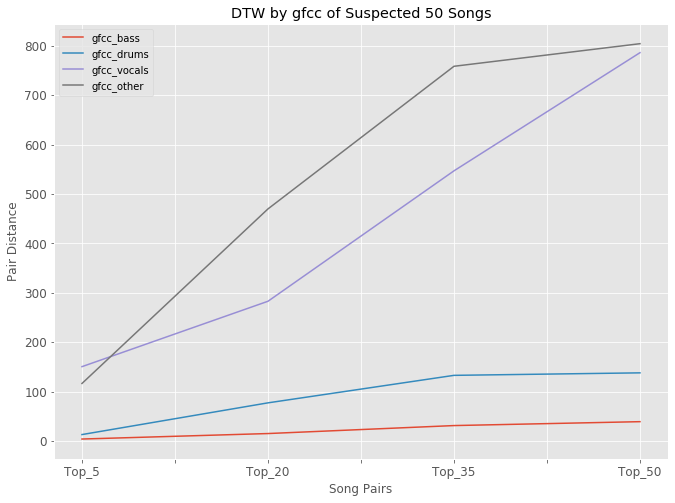

In [107]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
ax = dist_gfcc_Susp_50a.plot(kind='line', title ="DTW by gfcc of Suspected 50 Songs", figsize=(11, 8), legend=True, fontsize=12)
ax.set_xlabel("Song Pairs", fontsize=12)
ax.set_ylabel("Pair Distance", fontsize=12)
plt.show()

In [41]:
#### HPCP####
#### BASS####

dist_hpcp_5_b_t, cost_hpcp_5_b_t, acc_cost_hpcp_5_b_t, path = dtw(HPCP1_bass_ts_1_5 .T, HPCP2_bass_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_20_b_t, cost_hpcp_20_b_t, acc_cost_hpcp_20_b_t, path = dtw(HPCP1_bass_ts_1_20 .T, HPCP2_bass_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_35_b_t, cost_hpcp_35_b_t, acc_cost_hpcp_35_b_t, path = dtw(HPCP1_bass_ts_1_35 .T, HPCP2_bass_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_45_b_t, cost_hpcp_45_b_t, acc_cost_hpcp_45_b_t, path = dtw(HPCP1_bass_ts_1_45 .T, HPCP2_bass_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_hpcp_bass_t = ([dist_hpcp_5_b_t,dist_hpcp_20_b_t,dist_hpcp_35_b_t,dist_hpcp_45_b_t])
cost_hpcp_bass_t = ([cost_hpcp_5_b_t,cost_hpcp_20_b_t,cost_hpcp_35_b_t,cost_hpcp_45_b_t])
acc_cost_hpcp_bass_t = ([acc_cost_hpcp_5_b_t,acc_cost_hpcp_20_b_t,acc_cost_hpcp_35_b_t,acc_cost_hpcp_45_b_t])
print('Norm. dist. b/w two sounds: dist_hpcp_bass_t -', dist_mfcc_bass_t)

#### DRUMS ####
dist_hpcp_5_d_t, cost_hpcp_5_d_t, acc_cost_hpcp_5_d_t, path = dtw(HPCP1_drums_ts_1_5 .T, HPCP2_drums_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_20_d_t, cost_hpcp_20_d_t, acc_cost_hpcp_20_d_t, path = dtw(HPCP1_drums_ts_1_20 .T, HPCP2_drums_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_35_d_t, cost_hpcp_35_d_t, acc_cost_hpcp_35_d_t, path = dtw(HPCP1_drums_ts_1_35 .T, HPCP2_drums_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_45_d_t, cost_hpcp_45_d_t, acc_cost_hpcp_45_d_t, path = dtw(HPCP1_drums_ts_1_45 .T, HPCP2_drums_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_hpcp_drums_t = ([dist_hpcp_5_d_t,dist_hpcp_20_d_t,dist_hpcp_35_d_t,dist_hpcp_45_d_t])
cost_hpcp_drums_t = ([cost_hpcp_5_d_t,cost_hpcp_20_d_t,cost_hpcp_35_d_t,cost_hpcp_45_d_t])
acc_cost_hpcp_drums_t = ([acc_cost_hpcp_5_d_t,acc_cost_hpcp_20_d_t,acc_cost_hpcp_35_d_t,acc_cost_hpcp_45_d_t])
print('Norm. dist. b/w two sounds: dist_hpcp_drums_t -', dist_mfcc_drums_t)

#### VOCALS ####
dist_hpcp_5_v_t, cost_hpcp_5_v_t, acc_cost_hpcp_5_v_t, path = dtw(HPCP1_vocals_ts_1_5 .T, HPCP2_vocals_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_20_v_t, cost_hpcp_20_v_t, acc_cost_hpcp_20_v_t, path = dtw(HPCP1_vocals_ts_1_20 .T, HPCP2_vocals_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_35_v_t, cost_hpcp_35_v_t, acc_cost_hpcp_35_v_t, path = dtw(HPCP1_vocals_ts_1_35 .T, HPCP2_vocals_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_45_v_t, cost_hpcp_45_v_t, acc_cost_hpcp_45_v_t, path = dtw(HPCP1_vocals_ts_1_45 .T, HPCP2_vocals_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_hpcp_vocals_t = ([dist_hpcp_5_v_t,dist_hpcp_20_v_t,dist_hpcp_35_v_t,dist_hpcp_45_v_t])
cost_hpcp_vocals_t = ([cost_hpcp_5_v_t,cost_hpcp_20_v_t,cost_hpcp_35_v_t,cost_hpcp_45_v_t])
acc_cost_hpcp_vocals_t = ([acc_cost_hpcp_5_v_t,acc_cost_hpcp_20_v_t,acc_cost_hpcp_35_v_t,acc_cost_hpcp_45_v_t])
print('Norm. dist. b/w two sounds: dist_hpcp_vocals_t -', dist_mfcc_vocals_t)

#### OTHER ####
dist_hpcp_5_o_t, cost_hpcp_5_o_t, acc_cost_hpcp_5_o_t, path = dtw(HPCP1_other_ts_1_5 .T, HPCP2_other_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_20_o_t, cost_hpcp_20_o_t, acc_cost_hpcp_20_o_t, path = dtw(HPCP1_other_ts_1_20 .T, HPCP2_other_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_35_o_t, cost_hpcp_35_o_t, acc_cost_hpcp_35_o_t, path = dtw(HPCP1_other_ts_1_35 .T, HPCP2_other_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_hpcp_45_o_t, cost_hpcp_45_o_t, acc_cost_hpcp_45_o_t, path = dtw(HPCP1_other_ts_1_45 .T, HPCP2_other_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_hpcp_other_t = ([dist_hpcp_5_o_t,dist_hpcp_20_o_t,dist_hpcp_35_o_t,dist_hpcp_45_o_t])
cost_hpcp_other_t = ([cost_hpcp_5_o_t,cost_hpcp_20_o_t,cost_hpcp_35_o_t,cost_hpcp_45_o_t])
acc_cost_hpcp_other_t = ([acc_cost_hpcp_5_o_t,acc_cost_hpcp_20_o_t,acc_cost_hpcp_35_o_t,acc_cost_hpcp_45_o_t])
print('Norm. dist. b/w two sounds: dist_hpcp_other_t -', dist_mfcc_other_t)

Norm. dist. b/w two sounds: dist_hpcp_bass_t - [0.0062491918142768554, 0.0076720152375639936, 0.012148125393351965, 0.014332297563370393]
Norm. dist. b/w two sounds: dist_hpcp_drums_t - [0.004694202361861244, 0.006670872889024793, 0.009270802360246355, 0.011710181698080913]
Norm. dist. b/w two sounds: dist_hpcp_vocals_t - [0.0006563718488905579, 0.002360026336919674, 0.0037899244629893136, 0.006981338174412488]
Norm. dist. b/w two sounds: dist_hpcp_other_t - [0.0007647579391232284, 0.0034224539781462227, 0.005641971109071164, 0.006213186146851513]


In [104]:
li = [dist_hpcp_bass_t, dist_hpcp_drums_t, dist_hpcp_vocals_t, dist_hpcp_other_t]
dist_hpcp_Susp_50 = pd.DataFrame(data = li, columns= ["Top_5", "Top_20", "Top_35", "Top_50"])

dist_hpcp_Susp_50

dist_hpcp_Susp_50T = dist_mfcc_Susp_50.T
dist_hpcp_Susp_50T
dist_hpcp_Susp_50a =dist_mfcc_Susp_50T.rename(columns = {dist_hpcp_Susp_50T.columns[0]:'hpcp_bass', dist_hpcp_Susp_50T.columns[1]:'hpcp_drums', 
                                                           dist_hpcp_Susp_50T.columns[2]:'hpcp_vocals', dist_hpcp_Susp_50T.columns[3]:'hpcp_other'})

dist_hpcp_Susp_50a

,hpcp_bass,hpcp_drums,hpcp_vocals,hpcp_other
Top_5,0.006249,0.004694,0.000656,0.000765
Top_20,0.007672,0.006671,0.002360,0.003422
Top_35,0.012148,0.009271,0.003790,0.005642
Top_50,0.014332,0.011710,0.006981,0.006213


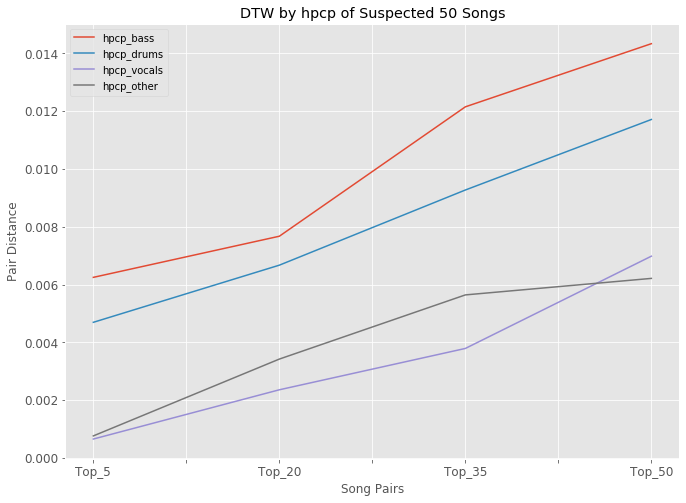

In [108]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
ax = dist_hpcp_Susp_50a.plot(kind='line', title ="DTW by hpcp of Suspected 50 Songs", figsize=(11, 8), legend=True, fontsize=12)
ax.set_xlabel("Song Pairs", fontsize=12)
ax.set_ylabel("Pair Distance", fontsize=12)
plt.show()

In [43]:
#### SIM-MAT & SIM-DIST ####

#### BASS ####
dist_sim_mat_dis_5_b_t, cost_sim_mat_dis_5_b_t, acc_cost_sim_mat_dis_5_b_t, path = dtw(sim_mat_bass_ts_1_5 .T, sim_dist_bass_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_20_b_t, cost_sim_mat_dis_20_b_t, acc_cost_sim_mat_dis_20_b_t, path = dtw(sim_mat_bass_ts_1_20 .T, sim_dist_bass_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_35_b_t, cost_sim_mat_dis_35_b_t, acc_cost_sim_mat_dis_35_b_t, path = dtw(sim_mat_bass_ts_1_35 .T, sim_dist_bass_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_45_b_t, cost_sim_mat_dis_45_b_t, acc_cost_sim_mat_dis_45_b_t, path = dtw(sim_mat_bass_ts_1_45 .T, sim_dist_bass_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_sim_mat_dis_bass_t = ([dist_sim_mat_dis_5_b_t,dist_sim_mat_dis_20_b_t,dist_sim_mat_dis_35_b_t,dist_sim_mat_dis_45_b_t])
cost_sim_mat_dis_bass_t = ([cost_sim_mat_dis_5_b_t,cost_sim_mat_dis_20_b_t,cost_sim_mat_dis_35_b_t,cost_sim_mat_dis_45_b_t])
acc_cost_sim_mat_dis_bass_t = ([acc_cost_sim_mat_dis_5_b_t,acc_cost_sim_mat_dis_20_b_t,acc_cost_sim_mat_dis_35_b_t,acc_cost_sim_mat_dis_45_b_t])
print('Norm. dist. b/w two sounds: dist_sim_mat_dis_bass_t -', dist_sim_mat_dis_bass_t)

#### DRUMS ####
dist_sim_mat_dis_5_d_t, cost_sim_mat_dis_5_d_t, acc_cost_sim_mat_dis_5_d_t, path = dtw(sim_mat_drums_ts_1_5 .T, sim_dist_drums_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_20_d_t, cost_sim_mat_dis_20_d_t, acc_cost_sim_mat_dis_20_d_t, path = dtw(sim_mat_drums_ts_1_20 .T, sim_dist_drums_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_35_d_t, cost_sim_mat_dis_35_d_t, acc_cost_sim_mat_dis_35_d_t, path = dtw(sim_mat_drums_ts_1_35 .T, sim_dist_drums_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_45_d_t, cost_sim_mat_dis_45_d_t, acc_cost_sim_mat_dis_45_d_t, path = dtw(sim_mat_drums_ts_1_45 .T, sim_dist_drums_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_sim_mat_dis_drums_t = ([dist_sim_mat_dis_5_d_t,dist_sim_mat_dis_20_d_t,dist_sim_mat_dis_35_d_t,dist_sim_mat_dis_45_d_t])
cost_sim_mat_dis_drums_t = ([cost_sim_mat_dis_5_d_t,cost_sim_mat_dis_20_d_t,cost_sim_mat_dis_35_d_t,cost_sim_mat_dis_45_d_t])
acc_cost_sim_mat_dis_drums_t = ([acc_cost_sim_mat_dis_5_d_t,acc_cost_sim_mat_dis_20_d_t,acc_cost_sim_mat_dis_35_d_t,acc_cost_sim_mat_dis_45_d_t])
print('Norm. dist. b/w two sounds: dist_sim_mat_dis_drums_t -', dist_sim_mat_dis_drums_t)

#### VOCALS ####
dist_sim_mat_dis_5_v_t, cost_sim_mat_dis_5_v_t, acc_cost_sim_mat_dis_5_v_t, path = dtw(sim_mat_vocals_ts_1_5 .T, sim_dist_vocals_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_20_v_t, cost_sim_mat_dis_20_v_t, acc_cost_sim_mat_dis_20_v_t, path = dtw(sim_mat_vocals_ts_1_20 .T, sim_dist_vocals_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_35_v_t, cost_sim_mat_dis_35_v_t, acc_cost_sim_mat_dis_35_v_t, path = dtw(sim_mat_vocals_ts_1_35 .T, sim_dist_vocals_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_45_v_t, cost_sim_mat_dis_45_v_t, acc_cost_sim_mat_dis_45_v_t, path = dtw(sim_mat_vocals_ts_1_45 .T, sim_dist_vocals_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_sim_mat_dis_vocals_t = ([dist_sim_mat_dis_5_v_t,dist_sim_mat_dis_20_v_t,dist_sim_mat_dis_35_v_t,dist_sim_mat_dis_45_v_t])
cost_sim_mat_dis_vocals_t = ([cost_sim_mat_dis_5_v_t,cost_sim_mat_dis_20_v_t,cost_sim_mat_dis_35_v_t,cost_sim_mat_dis_45_v_t])
acc_cost_sim_mat_dis_vocals_t = ([acc_cost_sim_mat_dis_5_v_t,acc_cost_sim_mat_dis_20_v_t,acc_cost_sim_mat_dis_35_v_t,acc_cost_sim_mat_dis_45_v_t])
print('Norm. dist. b/w two sounds: dist_sim_mat_dis_vocals_t -', dist_sim_mat_dis_vocals_t)

#### OTHER ####
dist_sim_mat_dis_5_o_t, cost_sim_mat_dis_5_o_t, acc_cost_sim_mat_dis_5_o_t, path = dtw(sim_mat_other_ts_1_5 .T, sim_dist_other_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_20_o_t, cost_sim_mat_dis_20_o_t, acc_cost_sim_mat_dis_20_o_t, path = dtw(sim_mat_other_ts_1_20 .T, sim_dist_other_ts_1_20 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_35_o_t, cost_sim_mat_dis_35_o_t, acc_cost_sim_mat_dis_35_o_t, path = dtw(sim_mat_other_ts_1_35 .T, sim_dist_other_ts_1_35 .T, dist=lambda x, y: norm(x - y, ord=None))
dist_sim_mat_dis_45_o_t, cost_sim_mat_dis_45_o_t, acc_cost_sim_mat_dis_45_o_t, path = dtw(sim_mat_other_ts_1_45 .T, sim_dist_other_ts_1_45 .T, dist=lambda x, y: norm(x - y, ord=None))


dist_sim_mat_dis_other_t = ([dist_sim_mat_dis_5_o_t,dist_sim_mat_dis_20_o_t,dist_sim_mat_dis_35_o_t,dist_sim_mat_dis_45_o_t])
cost_sim_mat_dis_other_t = ([cost_sim_mat_dis_5_o_t,cost_sim_mat_dis_20_o_t,cost_sim_mat_dis_35_o_t,cost_sim_mat_dis_45_o_t])
acc_cost_sim_mat_dis_other_t = ([acc_cost_sim_mat_dis_5_o_t,acc_cost_sim_mat_dis_20_o_t,acc_cost_sim_mat_dis_35_o_t,acc_cost_sim_mat_dis_45_o_t])
print('Norm. dist. b/w two sounds: dist_sim_mat_dis_other_t -', dist_sim_mat_dis_other_t)

Norm. dist. b/w two sounds: dist_sim_mat_dis_bass_t - [1448.6843448393047, 6984.2926864326, 11586.343795295805, 16709.978094967082]
Norm. dist. b/w two sounds: dist_sim_mat_dis_drums_t - [2048.8168287512035, 8929.573505946633, 16021.020864122745, 20850.256650068994]
Norm. dist. b/w two sounds: dist_sim_mat_dis_vocals_t - [1640.2481270526769, 7089.931727430201, 12338.20834822685, 16717.306775651057]
Norm. dist. b/w two sounds: dist_sim_mat_dis_other_t - [inf, inf, inf, inf]


In [105]:
li = [dist_sim_mat_dis_bass_t, dist_sim_mat_dis_drums_t, dist_sim_mat_dis_vocals_t, dist_sim_mat_dis_other_t]
dist_sim_mat_dis_Susp_50 = pd.DataFrame(data = li, columns= ["Top_5", "Top_20", "Top_35", "Top_50"])
dist_sim_mat_dis_Susp_50

dist_sim_mat_dis_Susp_50T = dist_sim_mat_dis_Susp_50.T
dist_sim_mat_dis_Susp_50T
dist_sim_mat_dis_Susp_50a = dist_sim_mat_dis_Susp_50T.rename(columns = {dist_sim_mat_dis_Susp_50T.columns[0]:'sim_mat_dis_bass', dist_sim_mat_dis_Susp_50T.columns[1]:'sim_mat_dis_drums', 
                                                           dist_sim_mat_dis_Susp_50T.columns[2]:'sim_mat_dis_vocals', dist_sim_mat_dis_Susp_50T.columns[3]:'sim_mat_dis_other'})

dist_sim_mat_dis_Cover_80a

,sim_mat_dis_bass,sim_mat_dis_drums,sim_mat_dis_vocals,sim_mat_dis_other
Top_5,3652.424468,3195.676425,3630.521169,3504.647904
Top_20,10594.648567,11116.404973,10843.795302,12200.990345
Top_35,17809.393332,20611.293564,18023.529374,20838.349585
Top_50,26404.685753,32188.300397,26677.217813,31443.842981
Top_77,35460.388450,44859.514560,34974.091676,41656.752270


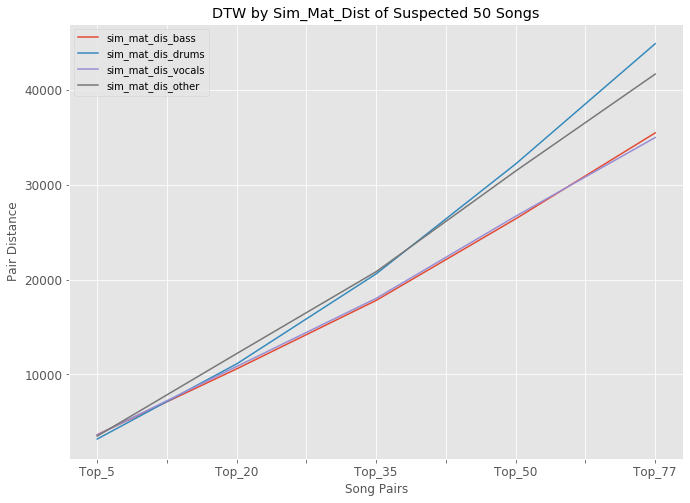

In [109]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
ax = dist_sim_mat_dis_Cover_80a.plot(kind='line', title ="DTW by Sim_Mat_Dist of Suspected 50 Songs", figsize=(11, 8), legend=True, fontsize=12)
ax.set_xlabel("Song Pairs", fontsize=12)
ax.set_ylabel("Pair Distance", fontsize=12)
plt.show()

#### Cover 80 - Final Dataframe for DTW Plot 

In [110]:
### MFCC ###
dist_mfcc_Cover_80a
### GFCC ###
dist_gfcc_Cover_80a
### HPCP ###
dist_hpcp_Cover_80a
### Sim_Matrix & Sim_Distance ###
dist_sim_mat_dis_Cover_80a

frames = [dist_mfcc_Cover_80a, dist_gfcc_Cover_80a,dist_hpcp_Cover_80a,dist_sim_mat_dis_Cover_80a ]
Cover_80_df = pd.concat(frames)
Cover_80_df

,mfcc_bass,mfcc_drums,mfcc_vocals,mfcc_other,gfcc_bass,gfcc_drums,gfcc_vocals,gfcc_other,hpcp_bass,hpcp_drums,hpcp_vocals,hpcp_other,sim_mat_dis_bass,sim_mat_dis_drums,sim_mat_dis_vocals,sim_mat_dis_other
Top_5,0.000696,0.000736,0.000568,0.000428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top_20,0.003851,0.002023,0.002465,0.002004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top_35,0.008001,0.004106,0.003559,0.003982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top_50,0.010693,0.006067,0.005355,0.006376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top_77,0.013834,0.010235,0.006355,0.007340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top_5,NaN,NaN,NaN,NaN,2.186121,16.164137,68.426600,36.445352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top_20,NaN,NaN,NaN,NaN,11.180494,26.077701,320.761314,191.570953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top_35,NaN,NaN,NaN,NaN,22.078703,62.577947,432.130506,275.824856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top_50,NaN,NaN,NaN,NaN,30.195417,94.490858,578.475114,428.980613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top_77,NaN,NaN,NaN,NaN,40.318012,148.592226,966.719412,620.719158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DTW for Cover 80 - Train Set

### DTW for MFCC 

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
 = dist_mfcc_Cover_80['feature']
ax = dist_mfcc_Cover_80.plot(y = y, kind='line', title ="DTW by MFCC of Cover 80 Songs", figsize=(11, 8), legend=True, fontsize=12)
ax.set_xlabel("Song Pairs", fontsize=12)
ax.set_ylabel("Pair Distance", fontsize=12)
plt.show()

KeyError: "None of [Index(['mfcc_bass', 'mfcc_drums', 'mfcc_vocals', 'mfcc_other'], dtype='object')] are in the [columns]"

### DTW for GFCC 

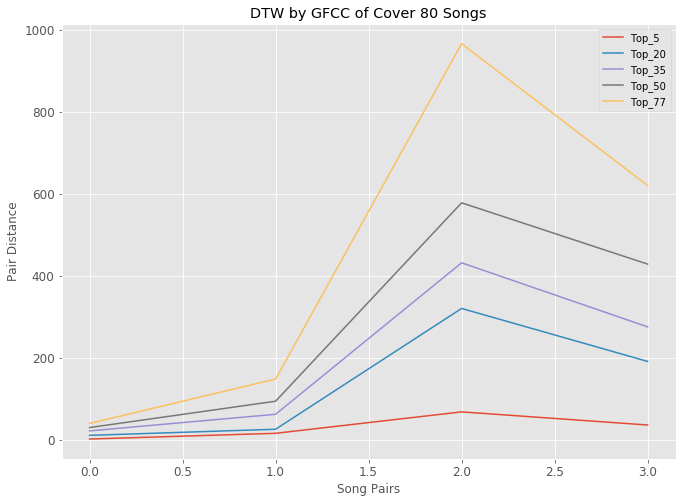

In [54]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
ax = dist_gfcc_Cover_80.plot(kind='line', title ="DTW by GFCC of Cover 80 Songs", figsize=(11, 8), legend=True, fontsize=12)
ax.set_xlabel("Song Pairs", fontsize=12)
ax.set_ylabel("Pair Distance", fontsize=12)
plt.show()

### DTW for HPCP 

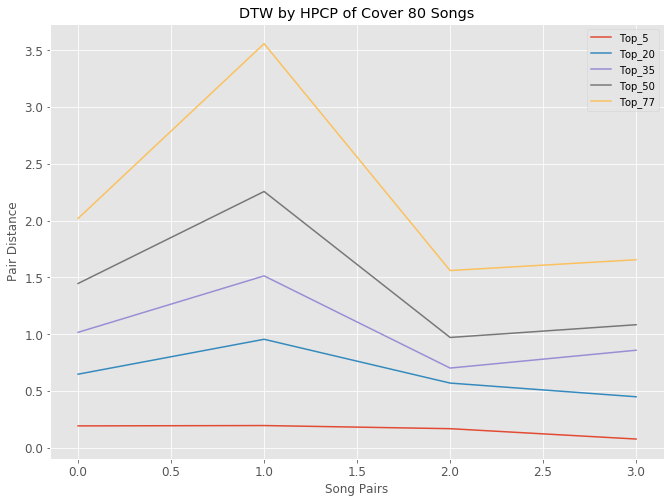

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
ax = dist_hpcp_Cover_80.plot(kind='line', title ="DTW by HPCP of Cover 80 Songs", figsize=(11, 8), legend=True, fontsize=12)
ax.set_xlabel("Song Pairs", fontsize=12)
ax.set_ylabel("Pair Distance", fontsize=12)
plt.show()

### DTW for Matrix_Sim_Dist

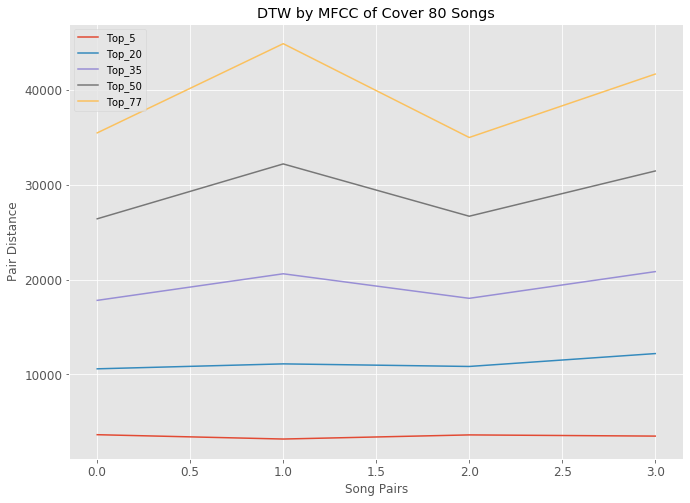

In [56]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
ax = dist_sim_mat_dis_Cover_80.plot(kind='line', title ="DTW by MFCC of Cover 80 Songs", figsize=(11, 8), legend=True, fontsize=12)
ax.set_xlabel("Song Pairs", fontsize=12)
ax.set_ylabel("Pair Distance", fontsize=12)
plt.show()

#### Susp 50 - Finall Dataframes for DTW Plot

In [324]:
### MFCC ###
dist_mfcc_Susp_50
### GFCC ###
dist_gfcc_Susp_50
### HPCP ###
dist_hpcp_Susp_50
### Sim_Matrix & Sim_Distance ###
dist_sim_mat_dis_Susp_50

frames = [dist_mfcc_Susp_50, dist_gfcc_Susp_50, dist_hpcp_Susp_50, dist_sim_mat_dis_Susp_50 ]
Susp_50_df = pd.concat(frames)
Susp_50_df

,Top_5,Top_20,Top_35,Top_50,feature
0,0.006249,0.007672,1.214813e-02,1.433230e-02,mfcc_bass
1,0.004694,0.006671,9.270802e-03,1.171018e-02,mfcc_drums
2,0.000656,0.002360,3.789924e-03,6.981338e-03,mfcc_vocals
3,0.000765,0.003422,5.641971e-03,6.213186e-03,mfcc_other
0,3.974118,15.077151,3.121514e+01,3.911890e+01,gfcc_bass
1,13.011512,77.196453,1.328456e+02,1.379078e+02,gfcc_drums
2,150.449491,282.779806,5.467296e+02,7.858469e+02,gfcc_vocals
3,116.423929,469.665741,7.583006e+02,8.040359e+02,gfcc_other
0,0.136778,0.846083,1.138834e+00,1.401115e+00,hpcp_bass
1,0.257390,1.059061,1.486827e+00,1.842618e+00,hpcp_drums


In [341]:
df = pd.concat([df_0, df_1, df_2], ignore_index=True, sort=False)

In [342]:
df

,MFCC_1,GFCC_1,HPCP_1,MFCC_2,GFCC_2,HPCP_2,sim_matrix
0,0.001230,70.617264,0.236928,0.000820,53.866570,0.239422,924.811218
1,0.000465,40.270172,0.314610,0.003155,140.719757,0.321678,759.359375
2,0.000403,21.099199,0.330665,0.000453,43.406658,0.341384,1244.238037


### ANOVA 

## Null - test2t1 is equalt to train2t. i.e. p-value <= 0.05

In [115]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(train2t, test2t1)
print(fvalue, pvalue)
# 23.27787426682977 3.8617587950504134e-06



23.27787426682977 3.8617587950504134e-06


In [17]:
#import csvfrom sklearn.model_selection 
#import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScalerimport,keras

ImportError: cannot import name 'StandardScalerimport' from 'sklearn.preprocessing' (/opt/tljh/user/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

In [12]:
#data = data.drop(['filename'],axis=1)#Encoding the Labels
#genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(newdf.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NameError: name 'LabelEncoder' is not defined